In [6]:
# Import Dependencies
import pandas as pd
import json
import requests
from pprint import pprint
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Import API key
from api_keys import api_key


In [46]:
headers = {'Authorization': 'Bearer %s' % api_key}

In [47]:
#search link on yelp
url='https://api.yelp.com/v3/businesses/search'

In [13]:
#running search through yelp and return the max results
data = []
count = 0
for offset in range(0, 1000, 50):
        params = {
            'limit': 50, 
            'location':'New York',
            'term': 'seabass',
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data += response.json()['businesses']
            count = count + 1
        elif response.status_code == 400:
            print('400 Bad Request')
            break
data

[{'id': 'WJS06XxRdc6DD1s4LWE9HA',
  'alias': 'fish-cheeks-new-york',
  'name': 'Fish Cheeks',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/pqupe3fe52869QQ23KkiBg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/fish-cheeks-new-york?adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=jNoG2_OHGxcce7ddjwUN_g',
  'review_count': 630,
  'categories': [{'alias': 'seafood', 'title': 'Seafood'},
   {'alias': 'thai', 'title': 'Thai'},
   {'alias': 'raw_food', 'title': 'Live/Raw Food'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.7258, 'longitude': -73.9927},
  'transactions': ['pickup', 'delivery'],
  'price': '$$',
  'location': {'address1': '55 Bond St',
   'address2': '',
   'address3': None,
   'city': 'New York',
   'zip_code': '10012',
   'country': 'US',
   'state': 'NY',
   'display_address': ['55 Bond St', 'New York, NY 10012']},
  'phone': '+12126772223',
  'display_phone': '(212) 677-2223',
  '

In [14]:
data[998]['url']

'https://www.yelp.com/biz/sushi-hana-japanese-restaurant-montclair?adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=jNoG2_OHGxcce7ddjwUN_g'

In [15]:
#showing the results of the search in dataframe
df = pd.DataFrame(data)
df

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,fish-cheeks-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.7258, 'longitude': -73.9927}",(212) 677-2223,2258.772058,WJS06XxRdc6DD1s4LWE9HA,https://s3-media2.fl.yelpcdn.com/bphoto/pqupe3...,False,"{'address1': '55 Bond St', 'address2': '', 'ad...",Fish Cheeks,+12126772223,$$,4.5,630,"[pickup, delivery]",https://www.yelp.com/biz/fish-cheeks-new-york?...
1,kotobuki-manhattan-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.731107, 'longitude': -73.98912}",(212) 353-5088,2886.611028,HFn1sPqKSzvxaMk2n2ZtJw,https://s3-media4.fl.yelpcdn.com/bphoto/lUQa7h...,False,"{'address1': '56 3rd Ave', 'address2': None, '...",Kotobuki Manhattan,+12123535088,$$,4.0,616,"[pickup, delivery]",https://www.yelp.com/biz/kotobuki-manhattan-ne...
2,au-zaatar-new-york,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 40.728901, 'longitude': -73.981185}",(212) 254-5660,2832.520301,0FaLilJs2VN83hOEBcBnPg,https://s3-media2.fl.yelpcdn.com/bphoto/dRtUTc...,False,"{'address1': '188 Avenue A', 'address2': '', '...",Au Za'atar,+12122545660,$$,4.0,847,"[pickup, delivery]",https://www.yelp.com/biz/au-zaatar-new-york?ad...
3,thai-villa-new-york-2,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...","{'latitude': 40.73902, 'longitude': -73.99065}",(212) 802-9999,3744.570400,B3_K2kUVbYOU0VaLcj_LTw,https://s3-media1.fl.yelpcdn.com/bphoto/OgCU9N...,False,"{'address1': '5 E 19th St', 'address2': 'G Flo...",Thai Villa,+12128029999,$$,4.5,3343,"[pickup, delivery]",https://www.yelp.com/biz/thai-villa-new-york-2...
4,the-seafire-grill-new-york-4,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.7547012104496, 'longitude': -7...",(212) 935-3785,5783.281476,ryvBsB9FrBBZDak87iGS1w,https://s3-media1.fl.yelpcdn.com/bphoto/Xfmipr...,False,"{'address1': '158 E 48th St', 'address2': None...",The Seafire Grill,+12129353785,$$$,4.5,1279,[],https://www.yelp.com/biz/the-seafire-grill-new...
5,extra-virgin-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.7353962496717, 'longitude': -7...",(212) 691-9359,3413.771056,KpBfFpjzsGvvqAzCasVW0g,https://s3-media2.fl.yelpcdn.com/bphoto/_uua75...,False,"{'address1': '259 W 4th St', 'address2': '', '...",Extra Virgin,+12126919359,$$,3.5,1244,"[pickup, delivery]",https://www.yelp.com/biz/extra-virgin-new-york...
6,little-basil-new-york-5,"[{'alias': 'thai', 'title': 'Thai'}]","{'latitude': 40.741014, 'longitude': -73.982259}",(212) 689-1444,4083.052134,A_GbgtUSyGWpihHZOqMdwQ,https://s3-media3.fl.yelpcdn.com/bphoto/Ojn2dq...,False,"{'address1': '153 E 26th St', 'address2': '', ...",Little Basil,+12126891444,$$,4.0,493,"[pickup, delivery]",https://www.yelp.com/biz/little-basil-new-york...
7,midtown-catch-new-york,"[{'alias': 'seafoodmarkets', 'title': 'Seafood...","{'latitude': 40.7582645924672, 'longitude': -7...",(646) 918-7560,6456.445759,LYwNv8P1oBSuWqEYaw7Wbg,https://s3-media3.fl.yelpcdn.com/bphoto/t_IxuL...,False,"{'address1': '405 E 57th St', 'address2': '', ...",Midtown Catch,+16469187560,$$,4.5,24,[],https://www.yelp.com/biz/midtown-catch-new-yor...
8,taverna-kyclades-east-village-new-york-2,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...","{'latitude': 40.7310782469639, 'longitude': -7...",(212) 432-0011,3018.164391,apykLG7DTZ-7xnOcZGDZZA,https://s3-media3.fl.yelpcdn.com/bphoto/ixZmWK...,False,"{'address1': '228 1st Ave', 'address2': '', 'a...",Taverna Kyclades - East Village,+12124320011,$$,4.0,824,"[pickup, delivery]",https://www.yelp.com/biz/taverna-kyclades-east...
9,seabra-marisqueira-newark,"[{'alias': 'portuguese', 'title': 'Portuguese'...","{'latitude': 40.72991, 'longitude': -74.16067}",(973) 465-1250,14283.696377,tCoC4QReUsoZKZvc1Ni5DA,https://s3-media3.fl.yelpcdn.com/bphoto/qnUZ43...,False,"{'address1': '87 Madison St', 'address2': '', ...",Seabra Marisqueira,+19734651

In [16]:
df = df.drop(columns=['is_closed', 'transactions', 'distance', 'coordinates', 'phone', 'image_url'])

In [17]:
df

,alias,categories,display_phone,id,location,name,price,rating,review_count,url
0,fish-cheeks-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 677-2223,WJS06XxRdc6DD1s4LWE9HA,"{'address1': '55 Bond St', 'address2': '', 'ad...",Fish Cheeks,$$,4.5,630,https://www.yelp.com/biz/fish-cheeks-new-york?...
1,kotobuki-manhattan-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",(212) 353-5088,HFn1sPqKSzvxaMk2n2ZtJw,"{'address1': '56 3rd Ave', 'address2': None, '...",Kotobuki Manhattan,$$,4.0,616,https://www.yelp.com/biz/kotobuki-manhattan-ne...
2,au-zaatar-new-york,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",(212) 254-5660,0FaLilJs2VN83hOEBcBnPg,"{'address1': '188 Avenue A', 'address2': '', '...",Au Za'atar,$$,4.0,847,https://www.yelp.com/biz/au-zaatar-new-york?ad...
3,thai-villa-new-york-2,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",(212) 802-9999,B3_K2kUVbYOU0VaLcj_LTw,"{'address1': '5 E 19th St', 'address2': 'G Flo...",Thai Villa,$$,4.5,3343,https://www.yelp.com/biz/thai-villa-new-york-2...
4,the-seafire-grill-new-york-4,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 935-3785,ryvBsB9FrBBZDak87iGS1w,"{'address1': '158 E 48th St', 'address2': None...",The Seafire Grill,$$$,4.5,1279,https://www.yelp.com/biz/the-seafire-grill-new...
5,extra-virgin-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 691-9359,KpBfFpjzsGvvqAzCasVW0g,"{'address1': '259 W 4th St', 'address2': '', '...",Extra Virgin,$$,3.5,1244,https://www.yelp.com/biz/extra-virgin-new-york...
6,little-basil-new-york-5,"[{'alias': 'thai', 'title': 'Thai'}]",(212) 689-1444,A_GbgtUSyGWpihHZOqMdwQ,"{'address1': '153 E 26th St', 'address2': '', ...",Little Basil,$$,4.0,493,https://www.yelp.com/biz/little-basil-new-york...
7,midtown-catch-new-york,"[{'alias': 'seafoodmarkets', 'title': 'Seafood...",(646) 918-7560,LYwNv8P1oBSuWqEYaw7Wbg,"{'address1': '405 E 57th St', 'address2': '', ...",Midtown Catch,$$,4.5,24,https://www.yelp.com/biz/midtown-catch-new-yor...
8,taverna-kyclades-east-village-new-york-2,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",(212) 432-0011,apykLG7DTZ-7xnOcZGDZZA,"{'address1': '228 1st Ave', 'address2': '', 'a...",Taverna Kyclades - East Village,$$,4.0,824,https://www.yelp.com/biz/taverna-kyclades-east...
9,seabra-marisqueira-newark,"[{'alias': 'portuguese', 'title': 'Portuguese'...",(973) 465-1250,tCoC4QReUsoZKZvc1Ni5DA,"{'address1': '87 Madison St', 'address2': '', ...",Seabra Marisqueira,$$,3.5,522,https://www.yelp.com/biz/seabra-marisqueira-ne...


In [18]:
#testing
df.location[1]["display_address"]

['56 3rd Ave', 'New York, NY 10003']

In [19]:
df.categories[1]

[{'alias': 'japanese', 'title': 'Japanese'},
 {'alias': 'sushi', 'title': 'Sushi Bars'},
 {'alias': 'seafood', 'title': 'Seafood'}]

In [20]:
df.categories[1][0]["title"]

'Japanese'

In [21]:
df.categories[2][0]["title"]

'Wine Bars'

In [22]:
#drop null data values- price seems to be missing
#---
df.drop('price', axis=1)
df = df.dropna(axis=0)
df = df.reset_index(drop=True)

In [23]:
df.shape
len(df)

944

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
alias            944 non-null object
categories       944 non-null object
display_phone    944 non-null object
id               944 non-null object
location         944 non-null object
name             944 non-null object
price            944 non-null object
rating           944 non-null float64
review_count     944 non-null int64
url              944 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 73.8+ KB


In [25]:
#split link
df[['new_url2', 'new_url3']]=df['url'].str.split('?', expand=True,n=2)

In [26]:
df['new_url2']

0          https://www.yelp.com/biz/fish-cheeks-new-york
1      https://www.yelp.com/biz/kotobuki-manhattan-ne...
2            https://www.yelp.com/biz/au-zaatar-new-york
3         https://www.yelp.com/biz/thai-villa-new-york-2
4      https://www.yelp.com/biz/the-seafire-grill-new...
5         https://www.yelp.com/biz/extra-virgin-new-york
6       https://www.yelp.com/biz/little-basil-new-york-5
7        https://www.yelp.com/biz/midtown-catch-new-york
8      https://www.yelp.com/biz/taverna-kyclades-east...
9      https://www.yelp.com/biz/seabra-marisqueira-ne...
10     https://www.yelp.com/biz/marc-forgione-new-york-2
11     https://www.yelp.com/biz/petite-crevette-brooklyn
12     https://www.yelp.com/biz/cornerstone-cafe-new-...
13     https://www.yelp.com/biz/blacksea-fish-and-gri...
14               https://www.yelp.com/biz/nerai-new-york
15                https://www.yelp.com/biz/fish-new-york
16           https://www.yelp.com/biz/aquagrill-new-york
17               https://www.ye

In [27]:
df['new_url2'] = df['new_url2'] + '?'

In [28]:
df.categories[1][0]["title"]

'Japanese'

In [29]:
#creating a dummy new column
df["New_Category"] = df.categories

In [30]:
#creating a dummy new column
df["New_zip_code"] = df.location

In [31]:
#creating a dummy new column
df["new_ID"] = df["id"]


In [32]:
#creating a dummy new column
df["URL"] = df["new_url2"]

In [33]:
#creating a dummy new column
df["Updated_city"] = df.location

In [34]:
df.location[1]["city"]

'New York'

In [35]:
df.location[1]["zip_code"]

'10003'

In [36]:
#creating a new dummy column for city, zip code, and food category
counting = 0
for k in range(0,len(df)):
    df["New_Category"][k] = df.categories[k][0]["title"]
    df["Updated_city"][k] = df.location[k]["city"]
    df["New_zip_code"][k] = df.location[k]["zip_code"] 
    #df["URL"][k] = df['URL'][k] + "?"
    #df["URL"][k] = df["new_url2"][k] + "?"
    #print("No:" + str(counting))
    #print("URL:", df.URL[k])
    #print("\n")
    #counting = counting + 1

C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
df["Updated_city"]

0           New York
1           New York
2           New York
3           New York
4           New York
5           New York
6           New York
7           New York
8           New York
9             Newark
10          New York
11          Brooklyn
12          New York
13         Rego Park
14          New York
15          New York
16          New York
17          Flushing
18          New York
19          Brooklyn
20          Brooklyn
21           Astoria
22          New York
23          New York
24          New York
25          Brooklyn
26          New York
27          New York
28          New York
29          New York
           ...      
914         New York
915      E Brunswick
916        Weehawken
917         Brooklyn
918    New Hyde Park
919        Englewood
920         Westwood
921         New York
922        Edgewater
923         Millburn
924     Howard Beach
925        Montclair
926    Staten Island
927         Lynbrook
928        Englewood
929         New York
930         C

In [38]:
df["New_Category"]

0                        Seafood
1                       Japanese
2                      Wine Bars
3                           Thai
4                        Seafood
5                        Seafood
6                           Thai
7                Seafood Markets
8                          Greek
9                     Portuguese
10                American (New)
11                       Seafood
12                       Italian
13                 Mediterranean
14                         Greek
15                       Seafood
16                       Seafood
17                        Korean
18                       Seafood
19                      Japanese
20                       Italian
21                 Mediterranean
22                        French
23                Latin American
24                American (New)
25                  Asian Fusion
26                       Italian
27                    Sushi Bars
28                       Seafood
29                    Sushi Bars
          

In [39]:
df['URL']

0         https://www.yelp.com/biz/fish-cheeks-new-york?
1      https://www.yelp.com/biz/kotobuki-manhattan-ne...
2           https://www.yelp.com/biz/au-zaatar-new-york?
3        https://www.yelp.com/biz/thai-villa-new-york-2?
4      https://www.yelp.com/biz/the-seafire-grill-new...
5        https://www.yelp.com/biz/extra-virgin-new-york?
6      https://www.yelp.com/biz/little-basil-new-york-5?
7       https://www.yelp.com/biz/midtown-catch-new-york?
8      https://www.yelp.com/biz/taverna-kyclades-east...
9      https://www.yelp.com/biz/seabra-marisqueira-ne...
10     https://www.yelp.com/biz/marc-forgione-new-yor...
11     https://www.yelp.com/biz/petite-crevette-brook...
12     https://www.yelp.com/biz/cornerstone-cafe-new-...
13     https://www.yelp.com/biz/blacksea-fish-and-gri...
14              https://www.yelp.com/biz/nerai-new-york?
15               https://www.yelp.com/biz/fish-new-york?
16          https://www.yelp.com/biz/aquagrill-new-york?
17              https://www.yel

In [223]:
# Create new table

df_graph = df[["name", "new_ID","URL","New_Category", "price", "rating",
                           "Updated_city", "review_count","location","New_zip_code"]]

df_graph.index.name = 'Index'
df_graph.head(5)

,name,new_ID,URL,New_Category,price,rating,Updated_city,review_count,location,New_zip_code
Index,,,,,,,,,,
0,Fish Cheeks,WJS06XxRdc6DD1s4LWE9HA,https://www.yelp.com/biz/fish-cheeks-new-york?,Seafood,$$,4.5,New York,630,"{'address1': '55 Bond St', 'address2': '', 'ad...",10012
1,Kotobuki Manhattan,HFn1sPqKSzvxaMk2n2ZtJw,https://www.yelp.com/biz/kotobuki-manhattan-ne...,Japanese,$$,4.0,New York,616,"{'address1': '56 3rd Ave', 'address2': None, '...",10003
2,Au Za'atar,0FaLilJs2VN83hOEBcBnPg,https://www.yelp.com/biz/au-zaatar-new-york?,Wine Bars,$$,4.0,New York,847,"{'address1': '188 Avenue A', 'address2': '', '...",10009
3,Thai Villa,B3_K2kUVbYOU0VaLcj_LTw,https://www.yelp.com/biz/thai-villa-new-york-2?,Thai,$$,4.5,New York,3343,"{'address1': '5 E 19th St', 'address2': 'G Flo...",10003
4,The Seafire Grill,ryvBsB9FrBBZDak87iGS1w,https://www.yelp.com/biz/the-seafire-grill-new...,Seafood,$$$,4.5,New York,1279,"{'address1': '158 E 48th St', 'address2': None...",10017


In [41]:
# grouped = us_restaurants.city.value_counts()[:10]


new_cat = df_graph["New_Category"].value_counts()[:10]
new_cat.head()

Italian           147
Japanese          115
American (New)     81
Sushi Bars         73
Seafood            68
Name: New_Category, dtype: int64

(8,)

In [42]:
new_cat[3]

73

In [49]:
rat_group = df_graph.groupby('rating')
rat_group

In [51]:
rat_cat_group = rat_group['rating'].count()
rat_cat_group.head

<bound method NDFrame.head of rating
1.5      1
2.0      1
2.5     11
3.0     71
3.5    273
4.0    457
4.5    123
5.0      7
Name: rating, dtype: int64>

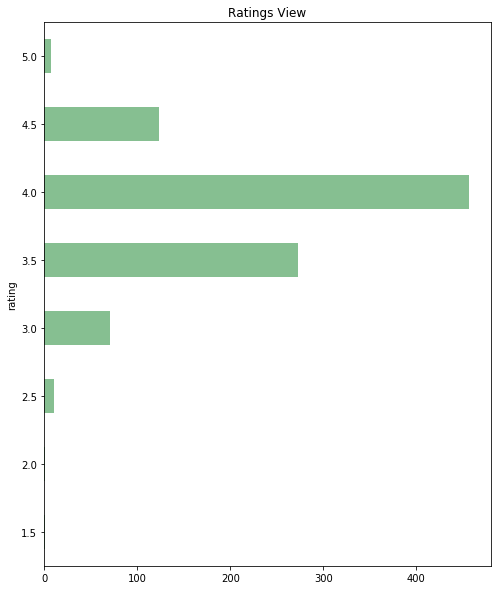

In [60]:
rate_chart = rat_cat_group.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=-1, width=0.5, title='Ratings View')

In [44]:
cat_group = df_graph.groupby('New_Category')

In [179]:
count_cat_group = cat_group['New_Category'].count().sort_values(ascending = False)[:10]
count_cat_group.head(5)

New_Category
Italian           147
Japanese          115
American (New)     81
Sushi Bars         73
Seafood            68
Name: New_Category, dtype: int64

In [ ]:
count_chart= new_cat.plot(kind='barh')    

In [ ]:
new_cat.reindex(labels).plot(kind='barh')

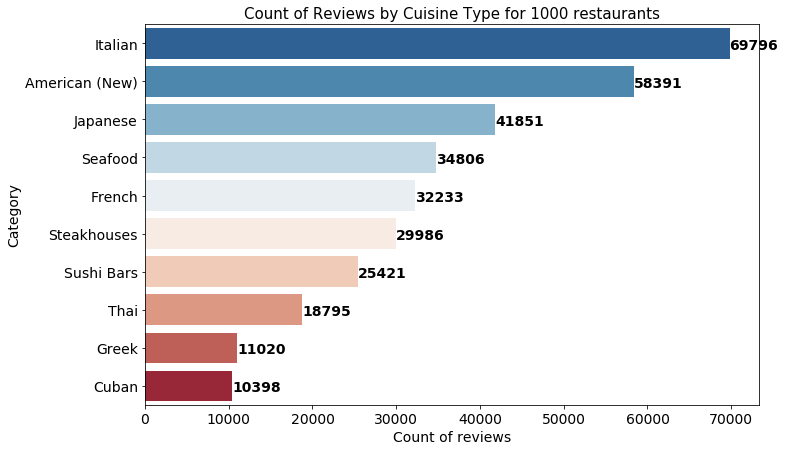

In [311]:
plt.figure(figsize=(11,7))
grouped = df_graph.groupby('New_Category')['review_count'].sum().sort_values(ascending = False)[:10]
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdBu_r", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type for 1000 restaurants', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

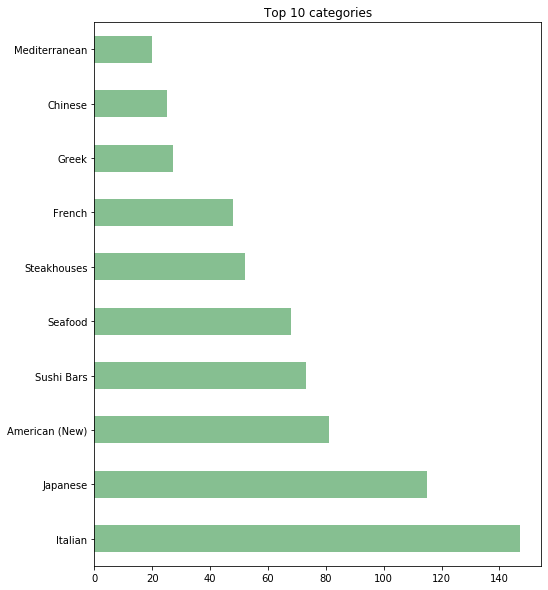

In [312]:
count_chart = new_cat.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=-1, width=0.5, title='Top 10 categories')

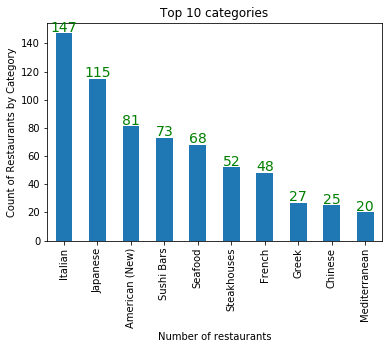

<Figure size 432x288 with 0 Axes>

In [313]:
# Create a bar chart based off of the group series from before
count_chart = new_cat.plot(kind='bar', title='Top 10 categories')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Number of restaurants")
count_chart.set_ylabel("Count of Restaurants by Category")
for index,data in enumerate(new_cat):
    plt.text(x=index, y =data+4, s=f"{data}", horizontalalignment ='center',color='green', fontdict=dict(fontsize=14), va='center')
plt.show()
plt.tight_layout()




In [384]:
df_graph

,name,new_ID,URL,New_Category,price,rating,Updated_city,review_count,location,New_zip_code
Index,,,,,,,,,,
0,Fish Cheeks,WJS06XxRdc6DD1s4LWE9HA,https://www.yelp.com/biz/fish-cheeks-new-york?,Seafood,$$,4.5000,New York,630,"{'address1': '55 Bond St', 'address2': '', 'ad...",10012
1,Kotobuki Manhattan,HFn1sPqKSzvxaMk2n2ZtJw,https://www.yelp.com/biz/kotobuki-manhattan-ne...,Japanese,$$,4.0000,New York,616,"{'address1': '56 3rd Ave', 'address2': None, '...",10003
2,Au Za'atar,0FaLilJs2VN83hOEBcBnPg,https://www.yelp.com/biz/au-zaatar-new-york?,Wine Bars,$$,4.0000,New York,847,"{'address1': '188 Avenue A', 'address2': '', '...",10009
3,Thai Villa,B3_K2kUVbYOU0VaLcj_LTw,https://www.yelp.com/biz/thai-villa-new-york-2?,Thai,$$,4.5000,New York,3343,"{'address1': '5 E 19th St', 'address2': 'G Flo...",10003
4,The Seafire Grill,ryvBsB9FrBBZDak87iGS1w,https://www.yelp.com/biz/the-seafire-grill-new...,Seafood,$$$,4.5000,New York,1279,"{'address1': '158 E 48th St', 'address2': None...",10017
5,Extra Virgin,KpBfFpjzsGvvqAzCasVW0g,https://www.yelp.com/biz/extra-virgin-new-york?,Seafood,$$,3.5000,New York,1244,"{'address1': '259 W 4th St', 'address2': '', '...",10014
6,Little Basil,A_GbgtUSyGWpihHZOqMdwQ,https://www.yelp.com/biz/little-basil-new-york-5?,Thai,$$,4.0000,New York,493,"{'address1': '153 E 26th St', 'address2': '', ...",10010
7,Midtown Catch,LYwNv8P1oBSuWqEYaw7Wbg,https://www.yelp.com/biz/midtown-catch-new-york?,Seafood Markets,$$,4.5000,New York,24,"{'address1': '405 E 57th St', 'address2': '', ...",10022
8,Taverna Kyclades - East Village,apykLG7DTZ-7xnOcZGDZZA,https://www.yelp.com/biz/taverna-kyclades-east...,Greek,$$,4.0000,New York,824,"{'address1': '228 1st Ave', 'address2': '', 'a...",10009


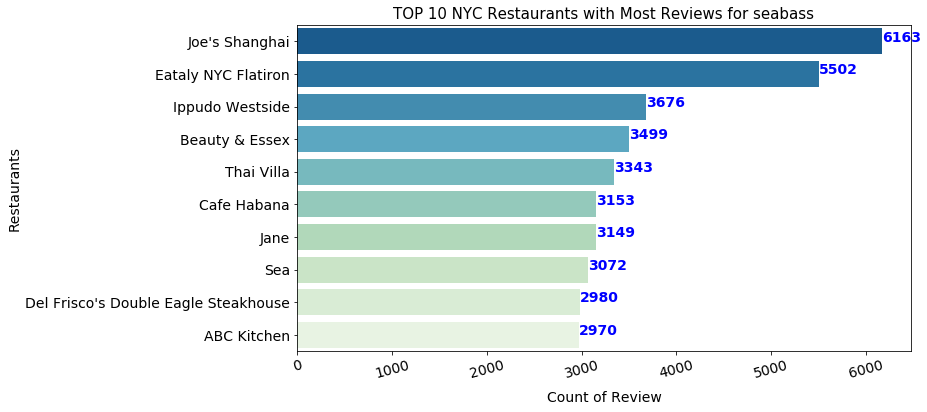

In [315]:
import seaborn as sns
# TOP 10 Restaurants with Most Reviews
plt.figure(figsize=(11,6))
grouped = df_graph[['name','review_count']].sort_values(by='review_count', ascending=False)[:10]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 NYC Restaurants with Most Reviews for seabass', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', color='blue', fontsize=14)

In [355]:
plt.style.use('ggplot')

  New_zip_code  review_count
0        10019         37835
1        10036         35913
2        10003         31653
3        10012         28800
4        10014         28159
5        10013         23860
6        10011         20068
7        10022         17462
8        10017         16532
9        10010         15931


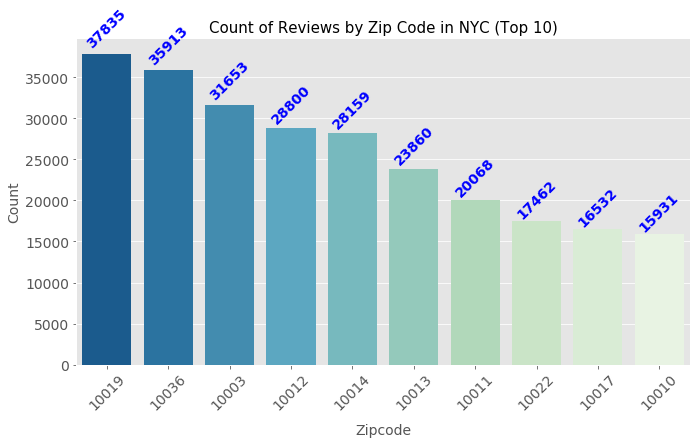

In [369]:
plt.figure(figsize=(11,6))


grouped = df_graph.groupby('New_zip_code')['review_count'].sum().sort_values(ascending=False)[:10]
grouped_df = pd.DataFrame(grouped.reset_index())
print(grouped_df)
grouped_df.columns =["New_zip_code","review_count"]

grouped_df = grouped_df.sort_values(['review_count'],ascending=False).reset_index(drop=True)


ax = sns.barplot(grouped_df.index, grouped_df.review_count,palette=sns.color_palette("GnBu_r", len(grouped_df))) 
plt.xlabel('Zipcode', labelpad=10, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by Zip Code in NYC (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',color='blue',rotation=45,fontweight='bold', fontsize=14)
    

ax.set_xticklabels(grouped_df.New_zip_code)
for item in ax.get_xticklabels(): item.set_rotation(45)


    

In [372]:
df

,alias,categories,display_phone,id,location,name,price,rating,review_count,url,new_url2,new_url3,New_Category,New_zip_code,new_ID,URL,Updated_city
Index,,,,,,,,,,,,,,,,,
0,fish-cheeks-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 677-2223,WJS06XxRdc6DD1s4LWE9HA,"{'address1': '55 Bond St', 'address2': '', 'ad...",Fish Cheeks,$$,4.5000,630,https://www.yelp.com/biz/fish-cheeks-new-york?...,https://www.yelp.com/biz/fish-cheeks-new-york?,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Seafood,10012,WJS06XxRdc6DD1s4LWE9HA,https://www.yelp.com/biz/fish-cheeks-new-york?,New York
1,kotobuki-manhattan-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",(212) 353-5088,HFn1sPqKSzvxaMk2n2ZtJw,"{'address1': '56 3rd Ave', 'address2': None, '...",Kotobuki Manhattan,$$,4.0000,616,https://www.yelp.com/biz/kotobuki-manhattan-ne...,https://www.yelp.com/biz/kotobuki-manhattan-ne...,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Japanese,10003,HFn1sPqKSzvxaMk2n2ZtJw,https://www.yelp.com/biz/kotobuki-manhattan-ne...,New York
2,au-zaatar-new-york,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",(212) 254-5660,0FaLilJs2VN83hOEBcBnPg,"{'address1': '188 Avenue A', 'address2': '', '...",Au Za'atar,$$,4.0000,847,https://www.yelp.com/biz/au-zaatar-new-york?ad...,https://www.yelp.com/biz/au-zaatar-new-york?,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Wine Bars,10009,0FaLilJs2VN83hOEBcBnPg,https://www.yelp.com/biz/au-zaatar-new-york?,New York
3,thai-villa-new-york-2,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",(212) 802-9999,B3_K2kUVbYOU0VaLcj_LTw,"{'address1': '5 E 19th St', 'address2': 'G Flo...",Thai Villa,$$,4.5000,3343,https://www.yelp.com/biz/thai-villa-new-york-2...,https://www.yelp.com/biz/thai-villa-new-york-2?,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Thai,10003,B3_K2kUVbYOU0VaLcj_LTw,https://www.yelp.com/biz/thai-villa-new-york-2?,New York
4,the-seafire-grill-new-york-4,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 935-3785,ryvBsB9FrBBZDak87iGS1w,"{'address1': '158 E 48th St', 'address2': None...",The Seafire Grill,$$$,4.5000,1279,https://www.yelp.com/biz/the-seafire-grill-new...,https://www.yelp.com/biz/the-seafire-grill-new...,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Seafood,10017,ryvBsB9FrBBZDak87iGS1w,https://www.yelp.com/biz/the-seafire-grill-new...,New York
5,extra-virgin-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 691-9359,KpBfFpjzsGvvqAzCasVW0g,"{'address1': '259 W 4th St', 'address2': '', '...",Extra Virgin,$$,3.5000,1244,https://www.yelp.com/biz/extra-virgin-new-york...,https://www.yelp.com/biz/extra-virgin-new-york?,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Seafood,10014,KpBfFpjzsGvvqAzCasVW0g,https://www.yelp.com/biz/extra-virgin-new-york?,New York
6,little-basil-new-york-5,"[{'alias': 'thai', 'title': 'Thai'}]",(212) 689-1444,A_GbgtUSyGWpihHZOqMdwQ,"{'address1': '153 E 26th St', 'address2': '', ...",Little Basil,$$,4.0000,493,https://www.yelp.com/biz/little-basil-new-york...,https://www.yelp.com/biz/little-basil-new-york-5?,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Thai,10010,A_GbgtUSyGWpihHZOqMdwQ,https://www.yelp.com/biz/little-basil-new-york-5?,New York
7,midtown-catch-new-york,"[{'alias': 'seafoodmarkets', 'title': 'Seafood...",(646) 918-7560,LYwNv8P1oBSuWqEYaw7Wbg,"{'address1': '405 E 57th St', 'address2': '', ...",Midtown Catch,$$,4.5000,24,https://www.yelp.com/biz/midtown-catch-new-yor...,https://www.yelp.com/biz/midtown-catch-new-york?,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Seafood Markets,10022,LYwNv8P1oBSuWqEYaw7Wbg,https://www.yelp.com/biz/midtown-catch-new-york?,New York
8,taverna-kyclades-east-village-new-york-2,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",(212) 432-0011,apykLG7DTZ-7xnOcZGDZZA,"{'address1': '228 1st Ave', 'address2': '', 'a...",Taverna Kyclades - East Village,$$,4.0000,824,https://www.yelp.com/biz/taverna-kyclades-east...,https://www.yelp.com/biz/taverna-kyclades-east...

In [380]:
# label reviews as positive or negative
df['labels'] = ''
df.loc[df.rating >=4, 'labels'] = 'positive'
df.loc[df.rating ==3, 'labels'] = 'neural'
df.loc[df.rating <3, 'labels'] = 'negative'

# drop neutral reviews for easy analysis
df.drop(df[df['labels'] =='neural'].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,alias,categories,display_phone,id,location,name,price,rating,review_count,url,new_url2,new_url3,New_Category,New_zip_code,new_ID,URL,Updated_city,labels
0,fish-cheeks-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 677-2223,WJS06XxRdc6DD1s4LWE9HA,"{'address1': '55 Bond St', 'address2': '', 'ad...",Fish Cheeks,$$,4.5000,630,https://www.yelp.com/biz/fish-cheeks-new-york?...,https://www.yelp.com/biz/fish-cheeks-new-york?,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Seafood,10012,WJS06XxRdc6DD1s4LWE9HA,https://www.yelp.com/biz/fish-cheeks-new-york?,New York,positive
1,kotobuki-manhattan-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",(212) 353-5088,HFn1sPqKSzvxaMk2n2ZtJw,"{'address1': '56 3rd Ave', 'address2': None, '...",Kotobuki Manhattan,$$,4.0000,616,https://www.yelp.com/biz/kotobuki-manhattan-ne...,https://www.yelp.com/biz/kotobuki-manhattan-ne...,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Japanese,10003,HFn1sPqKSzvxaMk2n2ZtJw,https://www.yelp.com/biz/kotobuki-manhattan-ne...,New York,positive
2,au-zaatar-new-york,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",(212) 254-5660,0FaLilJs2VN83hOEBcBnPg,"{'address1': '188 Avenue A', 'address2': '', '...",Au Za'atar,$$,4.0000,847,https://www.yelp.com/biz/au-zaatar-new-york?ad...,https://www.yelp.com/biz/au-zaatar-new-york?,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Wine Bars,10009,0FaLilJs2VN83hOEBcBnPg,https://www.yelp.com/biz/au-zaatar-new-york?,New York,positive
3,thai-villa-new-york-2,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",(212) 802-9999,B3_K2kUVbYOU0VaLcj_LTw,"{'address1': '5 E 19th St', 'address2': 'G Flo...",Thai Villa,$$,4.5000,3343,https://www.yelp.com/biz/thai-villa-new-york-2...,https://www.yelp.com/biz/thai-villa-new-york-2?,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Thai,10003,B3_K2kUVbYOU0VaLcj_LTw,https://www.yelp.com/biz/thai-villa-new-york-2?,New York,positive
4,the-seafire-grill-new-york-4,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 935-3785,ryvBsB9FrBBZDak87iGS1w,"{'address1': '158 E 48th St', 'address2': None...",The Seafire Grill,$$$,4.5000,1279,https://www.yelp.com/biz/the-seafire-grill-new...,https://www.yelp.com/biz/the-seafire-grill-new...,adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_cam...,Seafood,10017,ryvBsB9FrBBZDak87iGS1w,https://www.yelp.com/biz/the-seafire-grill-new...,New York,positive


In [ ]:
# Calculate the earliest/latest year a book was published
least_rev = df_graph["review_count"].min()
most_rev = df_graph["review_count"].max()

In [386]:
top_reviews = df_graph.nlargest(5,['review_count'])

In [387]:
top_reviews

,name,new_ID,URL,New_Category,price,rating,Updated_city,review_count,location,New_zip_code
Index,,,,,,,,,,
168,Joe's Shanghai,0CjK3esfpFcxIopebzjFxA,https://www.yelp.com/biz/joes-shanghai-new-yor...,Shanghainese,$$,4.0000,New York,6163,"{'address1': '46 Bowery St', 'address2': '', '...",10013
461,Eataly NYC Flatiron,a0IET3_yCFcO36OqGSsisg,https://www.yelp.com/biz/eataly-nyc-flatiron-n...,Italian,$$,4.0000,New York,5502,"{'address1': '200 5th Ave', 'address2': '', 'a...",10010
106,Ippudo Westside,TN4RnyqHMSupRFot4Q-_EA,https://www.yelp.com/biz/ippudo-westside-new-y...,Ramen,$$,4.0000,New York,3676,"{'address1': '321 W 51st St', 'address2': None...",10019
824,Beauty & Essex,pfmAcS-g6SiNG0KlLvrqnA,https://www.yelp.com/biz/beauty-and-essex-new-...,American (New),$$$,4.0000,New York,3499,"{'address1': '146 Essex St', 'address2': None,...",10002
3,Thai Villa,B3_K2kUVbYOU0VaLcj_LTw,https://www.yelp.com/biz/thai-villa-new-york-2?,Thai,$$,4.5000,New York,3343,"{'address1': '5 E 19th St', 'address2': 'G Flo...",10003


In [388]:
#Top 3 most reviews resturants based on search terms'seabass'
top_reviews['URL'].iloc[0]
top_reviews['URL'].iloc[1]
top_reviews['URL'].iloc[2]
top_reviews['URL'].iloc[3]
top_reviews['URL'].iloc[4]

'https://www.yelp.com/biz/thai-villa-new-york-2?'

In [389]:
#Top 3 recommended resturants based on search terms 'seabass'
df_graph['URL'].loc[0]
df_graph['URL'].loc[1]
df_graph['URL'].loc[2]
df_graph['URL'].loc[3]
df_graph['URL'].loc[4]

'https://www.yelp.com/biz/the-seafire-grill-new-york-4?'

In [ ]:
df_graph['URL'].loc[2]

In [ ]:
#------------------------------------------------------------
#Searching for Top 3 resturants on the word frequency

In [60]:
#Importing packages, Dependencies
from selenium import webdriver
from splinter import Browser
import pandas as pd
import urllib
from bs4 import BeautifulSoup
import time
import requests
import json
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [61]:
# importing module for regex 
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())

In [757]:
# URL of page to be scraped
url_top1 = top_reviews['URL'].iloc[0]
url_top2 = top_reviews['URL'].iloc[1]
url_top3 = top_reviews['URL'].iloc[2]
url_top4 = top_reviews['URL'].iloc[3]
url_top5 = top_reviews['URL'].iloc[4]

url_rec1 = df_graph['URL'].loc[0]
url_rec2 = df_graph['URL'].loc[1]
url_rec3 = df_graph['URL'].loc[2]
url_rec4 = df_graph['URL'].loc[3]
url_rec5 = df_graph['URL'].loc[4]

url_rec3

'https://www.yelp.com/biz/au-zaatar-new-york?'

In [673]:
# Retrieve page with the requests module
#response = requests.get(url_top1)
response = requests.get(url_rec3)

In [674]:
soup = BeautifulSoup(response.text, "html.parser")

In [675]:
#Seabass
#url_top1
#url_top2
#url_top3
#url_rec1
#url_rec2
url_rec3


start = 0
num_pages = 7
end = 20* num_pages
x = 1
reviews = []
quote_add = []

while (start < end):
    try:
        new_url = url_rec3 + 'start=' + str(start)
        start +=20
        print (new_url)
        response = requests.get(new_url)
        soup = BeautifulSoup(response.text, "html.parser")
    #print(soup.prettify())
    #instructions = recipeSoup.find('div', class_='hidden').text
    #right_table4=soup.find_all('p', itemprop='description')
        quotes = soup.find_all('span', class_ = 'lemon--span__373c0__3997G raw__373c0__3rKqk')
        for quote in quotes:
            x = x+1
            print('Review:', x, '-------------')
            print(quote.text)
            quote_add.append(quote.text)
#-------------------------------------------------------------------newly added
#Makes all the letters lower in reviews
            review = quote.text.lower()
#expandContractions will put the dictionary made earlier to replace the contractions in the reviews
#Make sure to to run the cList dict cell or else there will be an error
            expandContractions(review)
#Cleaning the lemmas or words in reviews now will make it easier when we start predictive modeling
            words = word_tokenize(review)
            words = word_tokenize(review.replace('\n',' '))
            clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
            characters_to_remove = ["''",'``','...']
            clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
            english_stops = set(stopwords.words('english'))
            clean_words = [word for word in clean_words if word not in english_stops]
            wordnet_lemmatizer = WordNetLemmatizer()
            lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
            #lemma_list = str.replace(right_table4.get_text(strip=True),". ",".")
            reviews.append(lemma_list)
    #reviews.add(a)
    except:
    #reviews.append(right_table4)
        time.sleep(5)
    #print("Reviews:", a,"\n")
        page = urllib.request.urlopen(url)
        soup = BeautifulSoup(page)


https://www.yelp.com/biz/au-zaatar-new-york?start=0
Review: 2 -------------
Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.
Review: 3 -------------
Start your review of Au Za'atar.
Review: 4 -------------
Delicious flavored food; great concept to show off in front of guests. Definetely pricey & service was off. But recommend trying at least once if your in the mood for lots of gyroTip; ask for extra garlic sauce
Review: 5 -------------
I went here on Thanksgiving day after seeing the chicken shawarma go viral on social media this summer. The seating is snug and staff is polite, and the clientele on thanksgiving, was largely made of Middle Easterner diners, already signaling that the food was the real deal. As someone who has lived and dined extensively through UAE, the shawarma is sacred. The visual experience of grilling it on the spit by yourself while pecking at the mound of fries with the mezze and garlic sauce gets your appetite

Review: 25 -------------
Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.
Review: 26 -------------
Start your review of Au Za'atar.
Review: 27 -------------
The food is really good, we had several mezes including hummus, labneh, fattoush salad, za'atar manouche, baba ghanoush and Waraa enab (stuffed grapes leaves/dolma)The only one that I wouldn't order next time is the waraa enab, the rest was great.The music is great and traditional but a bit too loud, we had to speak very loudly to carry a conversation...
Review: 28 -------------
I wanted to come here for a long time and finally I made a reservation. It was a nice day out and we were seated outside. We ordered hummus and fries for appetizer and chicken kebab salad and lamb with rice for the entree. Food was not very good at all. Hummus was not very tasty, seemed more like a package hummus you buy at Whole Foods. Fries was good, but how can you mess it up? Salad was very bad, super 

Review: 47 -------------
Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.
Review: 48 -------------
Start your review of Au Za'atar.
Review: 49 -------------
It was good.  It could have been better.  They put several complimentary dips on the table which was a very nice touch. We had a couple of good salads as starters. For our main we shared the meat platter for 3.  It was an adequate size.  Not particularly skimpy but not generous either.  The meats were very tasty.  The chicken items were over cooked and dry.  Service was excellent.  The air conditioner was barely discernible on this very hot day. It was actually more comfortable sitting outside in the shade rather than inside.
Review: 50 -------------
Came here for Valentine's Day. Ordered the spicy falafel and it was delicious, best I've ever had. We also ordered the lamb table side shawarma and once we received our order I was very disappointed. The size was a lot smaller compare

Review: 71 -------------
Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.
Review: 72 -------------
Start your review of Au Za'atar.
Review: 73 -------------
Amazing ! Food was everything and more what I HAVE expected!! Went there last Saturday evening, my server was outstanding, ( Rachid ) made me and my friend fell special, very professional, caring , knowledgeable about food and culture !! TOP TOP TOP .Thanks TOTALLY RECOMMEND IT
Review: 74 -------------
Went there last night (Saturday) place was really busy! But my Sever provided us with an excellent service, making us fell comfortable, welcome and well informed. Food was Good and excellent service!!! Guys Request for Rachid he is awesome  .
Review: 75 -------------
Amazing ! Food was everything and more what I HAVE expected!! Went there on Saturday evening, my server was outstanding, made me and my friend fell special, very professional, caring , knowledgeable about food and cultu

Review: 96 -------------
Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.
Review: 97 -------------
Start your review of Au Za'atar.
Review: 98 -------------
Such a great experience! The food is out of this world. And to top it all off we had exceptional service by our server Klisara! Definitely recommend coming here!!!
Review: 99 -------------
Been twice and it's quickly become one of my favorite spots.  Been dying for good Lebanese and I haven't been disappointed bY a dish yet
Review: 100 -------------
Presentation was great !The server was absolutely amazing and soooo kind Thank you LINDA for making our experience lovely.The mint lemonade drink & french fries were the best!
Review: 101 -------------
Coming to the point its the zatar ssauce that takes away the charm. So delicious and good no wonder they give you a mountain of fries wwith the shwarma grill. Easily for 4 - 5 average eaters the grill iis a bit expensive at $78 but its p

Review: 142 -------------
Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.
Review: 143 -------------
Start your review of Au Za'atar.
Review: 144 -------------
Amazing amazing food and service from rachid! Made our visit to this restaurant very enjoyable and memorable!! Will definitely be back soon
Review: 145 -------------
The food was good! Presentation was awesome but the service needs some polishing. Our service wasn't bad but it wasn't five star either!! So over all, not to bad for a date night!
Review: 146 -------------
It's nice place but the food missed the mark on taste. We ordered 6 different appetizers and a table side chicken shwarma. Wouldn't go back to be honest
Review: 147 -------------
My husband and I came here for the first time to celebrate our wedding anniversary. The place is really nice, so make sure you make reservations. We came here for their popular dish the Tableside Shawarma. The staff, presentation of food

In [676]:
#uncleaned
reviews_collect = pd.DataFrame(quote_add, columns=['reviews'])
reviews_collect.head()

,reviews
0,"Your trust is our top concern, so businesses c..."
1,Start your review of Au Za'atar.
2,Delicious flavored food; great concept to show...
3,I went here on Thanksgiving day after seeing t...
4,Late night Lebanese that isn't a counter servi...


In [677]:
#saving reviews to csv
reviews_collect.to_csv (r'C:\Users\leroy\Desktop\reviews6.csv', index = True, header=True)

In [ ]:
reviews_collect

In [631]:
reviews

[['trust',
  'top',
  'concern',
  'business',
  'ca',
  "n't",
  'pay',
  'alter',
  'remove',
  'review',
  'learn'],
 ['start', 'review', 'joe', "'s", 'shanghai'],
 ['made',
  'trip',
  'chinatown',
  'pick-up',
  'joe',
  "'s",
  'shanghai',
  'via',
  'seamless/grubhub',
  'well',
  'worth',
  'effort',
  'pork',
  'meat',
  'soup',
  'dumpling',
  'scallion',
  'pancake',
  'appetizer',
  'excellent',
  'even',
  'managed',
  'get',
  'soup',
  'dumpling',
  'home',
  'intact',
  'though',
  'accidentally',
  'punctured',
  'couple',
  'serving',
  'though',
  'probably',
  'would',
  'even',
  'better',
  'able',
  'eat',
  'restaurant',
  'still',
  'much',
  'treat.for',
  'main',
  'dish',
  'peking',
  'duck',
  'also',
  'well',
  'done',
  'came',
  'usual',
  'accompaniment',
  'wrap',
  'scallion',
  'cucumber',
  'hoisin',
  'sauce',
  'perfect',
  'sharing',
  'service',
  'friendly',
  'efficient',
  'table',
  'setup',
  'right',
  'inside',
  'door',
  'food',
  'we

In [636]:
quote_add

["Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.",
 "Start your review of Joe's Shanghai.",
 "Made the trip to Chinatown to pick-up from Joe's Shanghai (via Seamless/Grubhub) and it was well worth the effort. We had the Pork Meat Soup Dumplings and a Scallion Pancake for appetizers and both were excellent. We even managed to get the Soup Dumplings home intact (though we accidentally punctured a couple of them In serving them). Though they probably would have been even better if we had been able to eat them in the restaurant, they were still very much a treat.For our main dish, we had the Peking Duck and it was also very well done. It came with the usual accompaniments (wraps, scallions, cucumbers and hoisin sauce) and was perfect for sharing. The service was friendly and efficient. \xa0They have a table setup right inside the door and the food was well packaged for travel.Great choice for pick-up or delivery!",
 'Joe\'s Shanghai is 

In [634]:
#cleaned
reviews_collect_cleaned = pd.DataFrame(np.array(reviews), columns=['review'])
reviews_collect_cleaned.head()

,review
0,"[trust, top, concern, business, ca, n't, pay, ..."
1,"[start, review, joe, 's, shanghai]"
2,"[made, trip, chinatown, pick-up, joe, 's, shan..."
3,"[joe, 's, shanghai, place, sure, please, almos..."
4,"[3.75/5one, last, stop, quarantine, good, enou..."


In [ ]:
import pandas as pd
from collections import defaultdict
word_name = []
y = 0

word_freq = defaultdict(int)

for text in quote_add:
    text = text.lower()
    
    text = text.replace(',', '')
    text = text.replace('.', '')
    text = text.replace('-', '')
    text = text.replace('/', '')
    text = text.replace('?', '')
    text = text.replace(')', '')
    text = text.replace('(', '')
    text = text.replace('!!', '')
    text = text.replace('"', '')
    text = text.replace('!', '')
    text = text.replace('', '')
    text = text.replace(':', '')
    text = text.replace(';', '')
    #cleaning
    #try:
          #method = str.replace(text.get_text(strip=True),". ","")
          #method = str.replace(method, ". ", ".")
          #method = str.replace(method, ".",".\n")
          #method = str.replace(method,", ","") 
        
    print(text)  
    #except AttributeError:
          #print("exit")
    for word in text.split():
        if word == "here":
            word = word.replace('here','')
        if word == "came":
            word = word.replace('came','')
        if word == "would":
            word = word.replace('would','')    
        if word == "go":
            word = word.replace('go','')
        if word == "out":
            word = word.replace('out','')
        if word == "by":
            word = word.replace('by','')    
        if word == "our":
            word = word.replace('our','')
        if word == "from":
            word = word.replace('from','')
        if word == "some":
            word = word.replace('some','')
        if word == "us":
            word = word.replace('us','')
        if word == "or":
            word = word.replace('or','')    
        if word == "can":
            word = word.replace('can','')    
        if word == "all":
            word = word.replace('all','')
        if word == "your":
            word = word.replace('your','')
        if word == "also":
            word = word.replace('also','')
        if word == "it's":
            word = word.replace("it's",'')    
        if word == "only":
            word = word.replace('only','')
        if word == "there":
            word = word.replace('there','')
        if word == "their":
            word = word.replace('their','')
        if word == "get":
            word = word.replace('get','')
        if word == "other":
            word = word.replace('other','')    
        if word == "a":
            word = word.replace('a','')
        if word == "to":
            word = word.replace('to','')
        if word == "i":
            word = word.replace('i','')
        if word == "of":
            word = word.replace('of','')
        if word == "is":
            word = word.replace('is','')
        if word == "was":
            word = word.replace('was','')
        if word == "in":
            word = word.replace('in','')
        if word == "for":
            word = word.replace('for','')
        if word == "it":
            word = word.replace('it','')
        if word == "with":
            word = word.replace('with','')
        if word == "when":
            word = word.replace('when','')
        if word == "which":
            word = word.replace('which','')
        if word == "just":
            word = word.replace('just','')    
        if word == "you":
            word = word.replace('you','')
        if word == "we":
            word = word.replace('we','')
        if word == "but":
            word = word.replace('but','')            
        if word == "this":
            word = word.replace('this','')
        if word == "that":
            word = word.replace('that','')
        if word == "be":
            word = word.replace('be','')
        if word == "my":
            word = word.replace('my','')    
        if word == "have":
            word = word.replace('have','')
        if word == "if":
            word = word.replace('if','')
        if word == "at":
            word = word.replace('at','')    
        if word == "had":
            word = word.replace('had','')    
        if word == "and":    
            word = word.replace('and', '')
        if word == "come":    
            word = word.replace('come', '')
        if word == "got":    
            word = word.replace('got', '')    
        if word == "the":        
            word = word.replace('the', '')
        if word == "as":        
            word = word.replace('as', '')    
        if word == "they":        
            word = word.replace('they', '')
        if word == "are":        
            word = word.replace('are', '')
        if word == "on":        
            word = word.replace('on', '')
        if word == "so":        
            word = word.replace('so', '')
        if word == "were":        
            word = word.replace('were', '')    
        if word == "dumpling":        
            word = word.replace("dumpling", "dumplings")
        if word == "dumplingss":        
            word = word.replace("dumplingss", "dumplings")
        if word != '':    
            word_freq[word] += 1
        #word_name.append(word)
        #word_freq['test'] = word_freq['test'].append(word)
        #word_name = word_name.append(word)
        y = y+1
        print('Word Counting:', y, '-------------')
        print(word)
        #word_name.append(word)

word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'Word_freq'}) \

word_freq_df.index.name = 'Word'

In [ ]:
#temp saving
word_freq_df.to_csv (r'C:\Users\leroy\Desktop\seabassyelpmostrecom3.csv', index = True, header=True)

In [19]:
from sqlalchemy import create_engine
# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import MetaData
Base = declarative_base()

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 



#Connect to local database
rds_connection_string = "postgres:2305nseW@localhost:5432/yelp_review_db"
engine = create_engine(f'postgresql://{rds_connection_string}')
conn = engine.connect()

In [20]:
engine.table_names()

['sb_yelpmostrecomm1',
 'sb_top_reviews3',
 'sb_yelp_mostrecomm2',
 'sb_yelp_mostrecomm3',
 'new2_sb_EatalyFlatiron_db',
 'new3_sb_IppudoWestside_db',
 'new1_sb_shanghaijoe_db',
 'sb_top_reviews1',
 'sb_top_reviews2',
 'toprevframes']

In [ ]:
#Use pandas to load csv converted DataFrame into database
#new_customer_data_df.to_sql(name='Yelp_reviews_seabass', con=engine, if_exists='append', index=False)

In [ ]:
#Confirm data has been added by querying the customer_name table top 20 words mentioned

new1_sb_shanghaijoe_db = pd.read_sql_query('select * from sb_top_reviews1', con=engine).head(20)

In [ ]:
new2_sb_EatalyFlatiron_db = pd.read_sql_query('select * from sb_top_reviews2', con=engine).head(20)

In [ ]:
new3_sb_IppudoWestside_db = pd.read_sql_query('select * from sb_top_reviews3', con=engine).head(20)

In [ ]:
#drop common words to satify top 20 words relating to food

In [ ]:
#to_drop = ['the', 'and', ]
#new1_seabass_shanghaijoe_db[~new1_seabass_shanghaijoe_db['word'].isin(to_drop)]

In [ ]:
new1_sb_shanghaijoe_db['id'] = ''

In [ ]:
new1_sb_shanghaijoe_db.head()

In [ ]:
#new1_sb_shanghaijoe_db.astype({'id': 'int64'}).dtypes

In [ ]:
new2_sb_EatalyFlatiron_db['id'] = ""

In [ ]:
new2_sb_EatalyFlatiron_db.head()

In [ ]:
new3_sb_IppudoWestside_db['id'] = ''

In [ ]:
new3_sb_IppudoWestside_db.head()

In [ ]:
new2_sb_EatalyFlatiron_db.info()

In [ ]:
new2_sb_EatalyFlatiron_db

In [ ]:
new3_sb_IppudoWestside_db

In [ ]:
#Combing all 3 dataframes and placing unique Id on the word
frames = [new1_sb_shanghaijoe_db, new2_sb_EatalyFlatiron_db, new3_sb_IppudoWestside_db]

result = pd.concat(frames).reset_index(drop=True) #resetting the indexes


In [ ]:
result['id'] = ''

In [ ]:
result['id'] = result.groupby(['word']).ngroup()

In [ ]:
toprevframes = result

In [ ]:
#switching varible
toprevframes.info()

In [ ]:
#creating a unique id column for word between top reviews 1st and 2nd
zcounter = 0
for z in range(0,len(result)):
    for y in range(0,len(new2_sb_EatalyFlatiron_db)):
        if result['word'][z] == new2_sb_EatalyFlatiron_db['word'][y]:
            new2_sb_EatalyFlatiron_db['id'][y] = result['id'][z]
            #print ("found " + str(new2_sb_EatalyFlatiron_db['id'][z]))
        if result['word'][z] == new1_sb_shanghaijoe_db['word'][y]:
            new1_sb_shanghaijoe_db['id'][y] = result['id'][z]    
        if result['word'][z] == new3_sb_IppudoWestside_db['word'][y]:
            new3_sb_IppudoWestside_db['id'][y] = result['id'][z]
            #print ("found " + str(new3_sb_IppudoWestside_db['id'][z]))
                       

    for w in range(0,len(new1_sb_shanghaijoe_db)):        
        if result['word'][z] == new2_sb_EatalyFlatiron_db['word'][w]:
            new2_sb_EatalyFlatiron_db['id'][w] = result['id'][z]
            #print ("found " + str(new2_sb_EatalyFlatiron_db['id'][z]))
        if result['word'][z] == new1_sb_shanghaijoe_db['word'][w]:
            new1_sb_shanghaijoe_db['id'][w] = result['id'][z]    
        if result['word'][z] == new3_sb_IppudoWestside_db['word'][w]:
            new3_sb_IppudoWestside_db['id'][w] = result['id'][z]
            #print ("found " + str(new3_sb_IppudoWestside_db['id'][z]))
            
#     for y in range(0,len(new3_sb_IppudoWestside_db)):
#         if result['word'][z] == new3_sb_IppudoWestside_db['word'][y]:
#             new3_sb_IppudoWestside_db['id'][y] = result['id'][z]
#             print ("found " + str(new3_sb_IppudoWestside_db['id'][z]))
#             break
        
        
        
        #if new2_sb_EatalyFlatiron_db['word'][y] != new1_sb_shanghaijoe_db['word'][z]:
        #    print ("putting in new " + str(y))
            #new2_sb_EatalyFlatiron_db['id'][y] =  new2_sb_EatalyFlatiron_db['id'][y] + str(20 + zcounter)
            #zcounter = zcounter + 1
            #print ("not found " + str(new2_sb_EatalyFlatiron_db['id'][z]))
        #else:
        #    print ("error")
   

    
#this code works    


In [21]:
new2_sb_EatalyFlatiron_db.head()

NameError: name 'new2_sb_EatalyFlatiron_db' is not defined

In [ ]:
new1_sb_shanghaijoe_db.info()

In [ ]:
new2_sb_EatalyFlatiron_db.info()

In [ ]:
new3_sb_IppudoWestside_db

In [ ]:
#converting object to int for id column
new1_sb_shanghaijoe_db["id"] = new1_sb_shanghaijoe_db["id"].astype(str).astype(int)

#converting object to int for id column
new2_sb_EatalyFlatiron_db["id"] = new2_sb_EatalyFlatiron_db["id"].astype(str).astype(int)

#converting object to int for id column
new3_sb_IppudoWestside_db["id"] = new3_sb_IppudoWestside_db["id"].astype(str).astype(int)

print(new3_sb_IppudoWestside_db.dtypes)
print(new2_sb_EatalyFlatiron_db.dtypes)
print(new1_sb_shanghaijoe_db.dtypes)

In [ ]:
new3_sb_IppudoWestside_db.head()

In [22]:
#showing all the tables in the database
engine.table_names()

['sb_yelpmostrecomm1',
 'sb_top_reviews3',
 'sb_yelp_mostrecomm2',
 'sb_yelp_mostrecomm3',
 'new2_sb_EatalyFlatiron_db',
 'new3_sb_IppudoWestside_db',
 'new1_sb_shanghaijoe_db',
 'sb_top_reviews1',
 'sb_top_reviews2',
 'toprevframes']

In [23]:
#Query one of the tabel content


sb_top_reviews1_db = pd.read_sql_query('select * from sb_top_reviews1', con=engine)
sb_top_reviews1_db.head

<bound method NDFrame.head of             word  word_freq
0      dumplings        360
1           soup        304
2            not        152
3           good        119
4           pork        118
5          place        116
6           food        101
7           wait        101
8          joe's         99
9       shanghai         91
10          very         72
11         table         71
12           one         70
13           out         69
14           new         69
15          more         64
16         fried         61
17          like         61
18       because         60
19    restaurant         60
20         about         59
21          come         59
22         order         58
23          came         58
24          will         57
25          from         57
26            an         56
27       noodles         54
28           our         53
29          long         53
...          ...        ...
2619     courses          1
2620    policies          1
2621    cashonly  

In [24]:
# from sqlalchemy.orm import Session
# session = Session(bind=engine)

In [25]:
# from sqlalchemy.ext.declarative import declarative_base
# Base = declarative_base()

# from sqlalchemy import Column, Integer, String, Float

In [ ]:
# new1_sb_shanghaijoe_db['word_freq'].values.astype(int)

In [ ]:
# new1_sb_shanghaijoe_db.info()

In [ ]:
# inserting table into database
# new2_sb_EatalyFlatiron_db.to_sql('new2_sb_EatalyFlatiron_db', engine)
# new3_sb_IppudoWestside_db.to_sql('new3_sb_IppudoWestside_db', engine)
# new1_sb_shanghaijoe_db.to_sql('new1_sb_shanghaijoe_db', engine)
# toprevframes.to_sql('toprevframes', engine)

In [ ]:
# Create a "Metadata" Layer That Abstracts our SQL Database
# ----------------------------------
#Base.metadata.create_all(engine)

# Use this to clear out the db
# ----------------------------------
Base.metadata.drop_all(engine)

In [26]:
#showing all the tables in the database
engine.table_names()

['sb_yelpmostrecomm1',
 'sb_top_reviews3',
 'sb_yelp_mostrecomm2',
 'sb_yelp_mostrecomm3',
 'new2_sb_EatalyFlatiron_db',
 'new3_sb_IppudoWestside_db',
 'new1_sb_shanghaijoe_db',
 'sb_top_reviews1',
 'sb_top_reviews2',
 'toprevframes']

In [27]:
#Query one of the tabel content - Eataly
sb_top_reviews2_db = pd.read_sql_query('select * from sb_top_reviews2', con=engine)
sb_top_reviews2_db.head()

,word,word_freq
0,place,111
1,food,84
2,pasta,83
3,not,81
4,eataly,79


In [ ]:
#Sentiment analysis
## Compute sentiment score (positive score - negative score)
## Return a sentiment polarity score: 1 = positive, 0 = negative

In [32]:
#Positive words and negative words

import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [28]:
sb_top_reviews1_db

,word,word_freq
0,dumplings,360
1,soup,304
2,not,152
3,good,119
4,pork,118
5,place,116
6,food,101
7,wait,101
8,joe's,99
9,shanghai,91


In [33]:
## import positive file which contains common meaningless positive words such as good
file_positive = open('positive.txt')
reader =csv.reader(file_positive)
positive_words = [word[0] for word in reader]

## import negative file which contains common meaningless positive words such as bad
file_negative = open('negative.txt')
reader =csv.reader(file_negative)
negative_words = [word[0] for word in reader]

In [ ]:
## only keep positive and negative words
def filter_words(review):
    words = [word for word in review.split() if word in positive_words + negative_words]
    words = ' '.join(words)
    return words

In [34]:
sb_top_reviews1_db['label'] =''
sb_top_reviews1_db['Outcome'] =''
sb_top_reviews1_db.head()


,word,word_freq,label,Outcome
0,dumplings,360,,
1,soup,304,,
2,not,152,,
3,good,119,,
4,pork,118,,


In [35]:
negative_words

['abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',

In [37]:
y = 0
for z in range(0,len(sb_top_reviews1_db)):
    
    for word in positive_words:
        if word == sb_top_reviews1_db['word'][z]:
            sb_top_reviews1_db['label'][z] ='positive'
            sb_top_reviews1_db["Outcome"][z] = 1
            print ("this is running-positive" +str(y)+ word)
            print (sb_top_reviews1_db['label'][z])
            y =y +1
            break;  
    for negword in negative_words:        
        if negword == sb_top_reviews1_db['word'][z]:
            sb_top_reviews1_db['label'][z] ='negative'
            sb_top_reviews1_db["Outcome"][z] = 0
            print ("this is running-negative")
            y =y +1
            break;
    if sb_top_reviews1_db['label'][z] =='':
            sb_top_reviews1_db['label'][z] ='neutral'            
            sb_top_reviews1_db['Outcome'][z] = 2
            print ("this is running-neutral" +str(y))
            y =y +1
             
         
            
                
z = z + 1    

C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


this is running-neutral0
this is running-neutral1


C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


this is running-positive2good
positive
this is running-neutral3
this is running-neutral4
this is running-neutral5
this is running-neutral6
this is running-neutral7
this is running-neutral8
this is running-neutral9
this is running-neutral10
this is running-neutral11
this is running-neutral12
this is running-neutral13
this is running-neutral14


C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


this is running-negative
this is running-positive16like
positive
this is running-neutral17
this is running-neutral18
this is running-neutral19
this is running-neutral20
this is running-neutral21
this is running-neutral22
this is running-neutral23
this is running-neutral24
this is running-neutral25
this is running-neutral26
this is running-neutral27
this is running-neutral28
this is running-neutral29
this is running-neutral30
this is running-neutral31
this is running-neutral32
this is running-neutral33
this is running-neutral34
this is running-neutral35
this is running-neutral36
this is running-neutral37
this is running-neutral38
this is running-positive39best
positive
this is running-neutral40
this is running-neutral41
this is running-neutral42
this is running-neutral43
this is running-neutral44
this is running-neutral45
this is running-positive46well
positive
this is running-neutral47
this is running-neutral48
this is running-neutral49
this is running-neutral50
this is running-neutral

this is running-neutral308
this is running-neutral309
this is running-neutral310
this is running-neutral311
this is running-neutral312
this is running-neutral313
this is running-neutral314
this is running-neutral315
this is running-neutral316
this is running-neutral317
this is running-neutral318
this is running-neutral319
this is running-negative
this is running-neutral321
this is running-negative
this is running-neutral323
this is running-neutral324
this is running-neutral325
this is running-neutral326
this is running-neutral327
this is running-neutral328
this is running-positive329enjoyed
positive
this is running-neutral330
this is running-neutral331
this is running-neutral332
this is running-neutral333
this is running-neutral334
this is running-neutral335
this is running-positive336clean
positive
this is running-negative
this is running-neutral338
this is running-neutral339
this is running-neutral340
this is running-neutral341
this is running-neutral342
this is running-positive343ha

this is running-neutral597
this is running-neutral598
this is running-neutral599
this is running-neutral600
this is running-neutral601
this is running-negative
this is running-neutral603
this is running-neutral604
this is running-neutral605
this is running-neutral606
this is running-neutral607
this is running-neutral608
this is running-neutral609
this is running-neutral610
this is running-neutral611
this is running-neutral612
this is running-neutral613
this is running-neutral614
this is running-positive615brighter
positive
this is running-neutral616
this is running-neutral617
this is running-neutral618
this is running-neutral619
this is running-neutral620
this is running-neutral621
this is running-neutral622
this is running-neutral623
this is running-neutral624
this is running-neutral625
this is running-neutral626
this is running-positive627work
positive
this is running-neutral628
this is running-neutral629
this is running-neutral630
this is running-neutral631
this is running-neutral63

this is running-neutral888
this is running-negative
this is running-neutral890
this is running-neutral891
this is running-neutral892
this is running-neutral893
this is running-positive894seasoned
positive
this is running-neutral895
this is running-neutral896
this is running-neutral897
this is running-neutral898
this is running-neutral899
this is running-neutral900
this is running-neutral901
this is running-neutral902
this is running-neutral903
this is running-neutral904
this is running-neutral905
this is running-neutral906
this is running-neutral907
this is running-neutral908
this is running-neutral909
this is running-positive910safe
positive
this is running-neutral911
this is running-neutral912
this is running-negative
this is running-neutral914
this is running-neutral915
this is running-neutral916
this is running-neutral917
this is running-neutral918
this is running-neutral919
this is running-neutral920
this is running-negative
this is running-neutral922
this is running-positive923co

this is running-neutral1170
this is running-positive1171stellar
positive
this is running-positive1172grand
positive
this is running-neutral1173
this is running-negative
this is running-negative
this is running-negative
this is running-neutral1177
this is running-neutral1178
this is running-neutral1179
this is running-neutral1180
this is running-neutral1181
this is running-negative
this is running-positive1183delicate
positive
this is running-neutral1184
this is running-neutral1185
this is running-neutral1186
this is running-neutral1187
this is running-neutral1188
this is running-neutral1189
this is running-neutral1190
this is running-neutral1191
this is running-neutral1192
this is running-negative
this is running-neutral1194
this is running-neutral1195
this is running-neutral1196
this is running-neutral1197
this is running-neutral1198
this is running-neutral1199
this is running-neutral1200
this is running-negative
this is running-neutral1202
this is running-neutral1203
this is running-

this is running-neutral1457
this is running-neutral1458
this is running-neutral1459
this is running-positive1460cheapest
positive
this is running-neutral1461
this is running-neutral1462
this is running-neutral1463
this is running-neutral1464
this is running-neutral1465
this is running-neutral1466
this is running-neutral1467
this is running-neutral1468
this is running-neutral1469
this is running-neutral1470
this is running-neutral1471
this is running-neutral1472
this is running-neutral1473
this is running-neutral1474
this is running-neutral1475
this is running-neutral1476
this is running-neutral1477
this is running-neutral1478
this is running-neutral1479
this is running-neutral1480
this is running-neutral1481
this is running-neutral1482
this is running-negative
this is running-neutral1484
this is running-neutral1485
this is running-neutral1486
this is running-neutral1487
this is running-neutral1488
this is running-neutral1489
this is running-neutral1490
this is running-neutral1491
this 

this is running-neutral1747
this is running-neutral1748
this is running-neutral1749
this is running-negative
this is running-neutral1751
this is running-neutral1752
this is running-neutral1753
this is running-neutral1754
this is running-neutral1755
this is running-neutral1756
this is running-neutral1757
this is running-negative
this is running-neutral1759
this is running-neutral1760
this is running-neutral1761
this is running-neutral1762
this is running-neutral1763
this is running-neutral1764
this is running-neutral1765
this is running-neutral1766
this is running-neutral1767
this is running-neutral1768
this is running-neutral1769
this is running-neutral1770
this is running-neutral1771
this is running-neutral1772
this is running-neutral1773
this is running-neutral1774
this is running-neutral1775
this is running-negative
this is running-neutral1777
this is running-negative
this is running-neutral1779
this is running-neutral1780
this is running-neutral1781
this is running-neutral1782
this

this is running-neutral2032
this is running-neutral2033
this is running-neutral2034
this is running-neutral2035
this is running-positive2036abundance
positive
this is running-neutral2037
this is running-positive2038standout
positive
this is running-neutral2039
this is running-neutral2040
this is running-negative
this is running-neutral2042
this is running-neutral2043
this is running-neutral2044
this is running-neutral2045
this is running-neutral2046
this is running-neutral2047
this is running-neutral2048
this is running-neutral2049
this is running-neutral2050
this is running-positive2051redeeming
positive
this is running-neutral2052
this is running-neutral2053
this is running-neutral2054
this is running-neutral2055
this is running-neutral2056
this is running-neutral2057
this is running-neutral2058
this is running-neutral2059
this is running-neutral2060
this is running-neutral2061
this is running-neutral2062
this is running-negative
this is running-neutral2064
this is running-neutral206

this is running-neutral2316
this is running-neutral2317
this is running-neutral2318
this is running-positive2319clear
positive
this is running-neutral2320
this is running-neutral2321
this is running-neutral2322
this is running-neutral2323
this is running-neutral2324
this is running-neutral2325
this is running-neutral2326
this is running-neutral2327
this is running-neutral2328
this is running-positive2329works
positive
this is running-neutral2330
this is running-neutral2331
this is running-neutral2332
this is running-positive2333renowned
positive
this is running-neutral2334
this is running-neutral2335
this is running-neutral2336
this is running-neutral2337
this is running-neutral2338
this is running-neutral2339
this is running-neutral2340
this is running-neutral2341
this is running-neutral2342
this is running-neutral2343
this is running-neutral2344
this is running-negative
this is running-neutral2346
this is running-negative
this is running-neutral2348
this is running-neutral2349
this i

this is running-neutral2600
this is running-neutral2601
this is running-neutral2602
this is running-neutral2603
this is running-negative
this is running-neutral2605
this is running-neutral2606
this is running-negative
this is running-neutral2608
this is running-neutral2609
this is running-neutral2610
this is running-positive2611favor
positive
this is running-neutral2612
this is running-neutral2613
this is running-negative
this is running-neutral2615
this is running-neutral2616
this is running-positive2617honest
positive
this is running-neutral2618
this is running-neutral2619
this is running-neutral2620
this is running-neutral2621
this is running-neutral2622
this is running-negative
this is running-neutral2624
this is running-neutral2625
this is running-neutral2626
this is running-neutral2627
this is running-neutral2628
this is running-neutral2629
this is running-negative
this is running-positive2631helping
positive
this is running-neutral2632
this is running-neutral2633
this is running

In [40]:
sb_top_reviews1_db['label'].value_counts()


neutral     2274
negative     188
positive     187
Name: label, dtype: int64

In [38]:
sb_top_reviews1_db.head()
sb_top_reviews1_db['label'].value_counts()


top10pos1 = sb_top_reviews1_db[sb_top_reviews1_db['label'].str.match('positive')][:10]
top10pos1

top10neg1 = sb_top_reviews1_db[sb_top_reviews1_db['label'].str.match('negative')][:10]
top10neg1.reset_index(drop=True, inplace=True)# resets the index
top10neg1.index.name = 'Index'
top10neg1

,word,word_freq,label,Outcome
Index,,,,
0,fried,61,negative,0
1,bad,15,negative,0
2,hype,14,negative,0
3,hard,13,negative,0
4,cold,13,negative,0
5,pan,9,negative,0
6,disappointed,9,negative,0
7,din,9,negative,0
8,crowded,8,negative,0


In [39]:
frames = [top10pos1, top10neg1]

result_polar = pd.concat(frames)
result_polar.reset_index(drop=True, inplace=True)
result_polar.index.name = 'Index'
result_polar

,word,word_freq,label,Outcome
Index,,,,
0,good,119,positive,1
1,like,61,positive,1
2,best,45,positive,1
3,well,41,positive,1
4,great,37,positive,1
5,delicious,36,positive,1
6,worth,35,positive,1
7,pretty,33,positive,1
8,better,29,positive,1


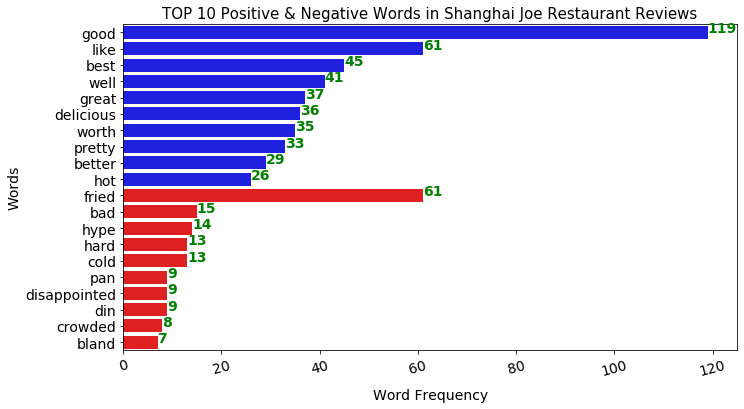

In [43]:
plt.figure(figsize=(11,6))
colors = ['red' if c == 'negative' else 'blue' for c in result_polar.label]
sns.barplot(y=result_polar.word, x=result_polar.word_freq, palette=colors)
plt.xlabel('Word Frequency', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('TOP 10 Positive & Negative Words in Shanghai Joe Restaurant Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(result_polar.word_freq):
    plt.text(v, i, str(v), fontweight='bold', color='green', fontsize=14)

In [751]:
#Query Fish cheek restaurant of the table content
sb_yelp_mostrecomm3 = pd.read_sql_query('select * from sb_yelp_mostrecomm3', con=engine)
sb_yelp_mostrecomm3

,word,word_freq
0,crab,242
1,fish,187
2,curry,185
3,thai,157
4,food,143
5,not,135
6,rice,133
7,sauce,132
8,spicy,131
9,very,130


In [752]:
sb_yelp_mostrecomm3.to_csv (r'C:\Users\leroy\Desktop\reviews7.csv', index = True, header=True)

In [765]:
sb_yelp_mostrecomm3['label'] =''
sb_yelp_mostrecomm3['Outcome'] =''
sb_yelp_mostrecomm3.head()

,word,word_freq,label,Outcome
0,crab,242,,
1,fish,187,,
2,curry,185,,
3,thai,157,,
4,food,143,,


In [772]:
#matching positive words
y = 0
for z in range(0,len(sb_yelp_mostrecomm3)):
    
    for word in positive_words:
        if word == sb_yelp_mostrecomm3['word'][z]:
            sb_yelp_mostrecomm3['label'][z] ='positive'
            sb_yelp_mostrecomm3["Outcome"][z] = 1
            print ("this is running-positive" +str(y)+ word)
            print (sb_yelp_mostrecomm3['label'][z])
            y =y +1
            break;  

         
            
                
z = z + 1 

C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


this is running-positive0good
positive
this is running-positive1delicious
positive
this is running-positive2like
positive
this is running-positive3great
positive
this is running-positive4happy
positive
this is running-positive5well
positive
this is running-positive6best
positive
this is running-positive7recommend
positive
this is running-positive8nice
positive
this is running-positive9favorite
positive
this is running-positive10love
positive
this is running-positive11sweet
positive
this is running-positive12pretty
positive
this is running-positive13amazing
positive
this is running-positive14fresh
positive
this is running-positive15perfect
positive
this is running-positive16super
positive
this is running-positive17worth
positive
this is running-positive18loved
positive
this is running-positive19top
positive
this is running-positive20right
positive
this is running-positive21tender
positive
this is running-positive22glory
positive
this is running-positive23perfectly
positive
this is runni

this is running-positive189sophisticated
positive
this is running-positive190brighter
positive
this is running-positive191admire
positive
this is running-positive192polite
positive
this is running-positive193prompt
positive
this is running-positive194pleasant
positive
this is running-positive195knowledgeable
positive
this is running-positive196exceeded
positive
this is running-positive197divine
positive
this is running-positive198bonus
positive
this is running-positive199healthy
positive
this is running-positive200properly
positive
this is running-positive201marveled
positive
this is running-positive202hottest
positive
this is running-positive203wins
positive
this is running-positive204classy
positive
this is running-positive205savior
positive
this is running-positive206accomplished
positive
this is running-positive207innovative
positive
this is running-positive208mighty
positive
this is running-positive209intimate
positive
this is running-positive210delight
positive
this is running-po

In [770]:
#matching negative words
y = 0
for z in range(0,len(sb_yelp_mostrecomm3)):
    for negword in negative_words:        
        if negword == sb_yelp_mostrecomm3['word'][z]:
            sb_yelp_mostrecomm3['label'][z] ='negative'
            sb_yelp_mostrecomm3["Outcome"][z] = 0
            print ("this is running-negative"+str(y))
            print (sb_yelp_mostrecomm3['label'][z])
            y =y +1
            break;
#         elif sb_yelp_mostrecomm3['label'][z] =='':
#             sb_yelp_mostrecomm3['label'][z] ='neutral'            
#             sb_yelp_mostrecomm3['Outcome'][z] = 2
#             print ("this is running-neutral" +str(y))
#             print (sb_yelp_mostrecomm3['label'][z])
#             y =y +1
#             break; 
         
            
                
z = z + 1 
    

C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


this is running-negative0
negative
this is running-negative1
negative
this is running-negative2
negative
this is running-negative3
negative
this is running-negative4
negative
this is running-negative5
negative
this is running-negative6
negative
this is running-negative7
negative
this is running-negative8
negative
this is running-negative9
negative
this is running-negative10
negative
this is running-negative11
negative
this is running-negative12
negative
this is running-negative13
negative
this is running-negative14
negative
this is running-negative15
negative
this is running-negative16
negative
this is running-negative17
negative
this is running-negative18
negative
this is running-negative19
negative
this is running-negative20
negative
this is running-negative21
negative
this is running-negative22
negative
this is running-negative23
negative
this is running-negative24
negative
this is running-negative25
negative
this is running-negative26
negative
this is running-negative27
negative
th

In [777]:
#matching neutral words
y = 0
for z in range(0,len(sb_yelp_mostrecomm3)):
    if sb_yelp_mostrecomm3['label'][z] =='':
            sb_yelp_mostrecomm3['label'][z] ='neutral'            
            sb_yelp_mostrecomm3['Outcome'][z] = 2
            print ("this is running-neutral" +str(y))
            print (sb_yelp_mostrecomm3['label'][z])
            y =y +1
             
         
            
                
z = z + 1 

C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


this is running-neutral0
neutral
this is running-neutral1
neutral
this is running-neutral2
neutral
this is running-neutral3
neutral
this is running-neutral4
neutral
this is running-neutral5
neutral
this is running-neutral6
neutral
this is running-neutral7
neutral
this is running-neutral8
neutral
this is running-neutral9
neutral
this is running-neutral10
neutral
this is running-neutral11
neutral
this is running-neutral12
neutral
this is running-neutral13
neutral
this is running-neutral14
neutral
this is running-neutral15
neutral
this is running-neutral16
neutral
this is running-neutral17
neutral
this is running-neutral18
neutral
this is running-neutral19
neutral
this is running-neutral20
neutral
this is running-neutral21
neutral
this is running-neutral22
neutral
this is running-neutral23
neutral
this is running-neutral24
neutral
this is running-neutral25
neutral
this is running-neutral26
neutral
this is running-neutral27
neutral
this is running-neutral28
neutral
this is running-neutral2

this is running-neutral239
neutral
this is running-neutral240
neutral
this is running-neutral241
neutral
this is running-neutral242
neutral
this is running-neutral243
neutral
this is running-neutral244
neutral
this is running-neutral245
neutral
this is running-neutral246
neutral
this is running-neutral247
neutral
this is running-neutral248
neutral
this is running-neutral249
neutral
this is running-neutral250
neutral
this is running-neutral251
neutral
this is running-neutral252
neutral
this is running-neutral253
neutral
this is running-neutral254
neutral
this is running-neutral255
neutral
this is running-neutral256
neutral
this is running-neutral257
neutral
this is running-neutral258
neutral
this is running-neutral259
neutral
this is running-neutral260
neutral
this is running-neutral261
neutral
this is running-neutral262
neutral
this is running-neutral263
neutral
this is running-neutral264
neutral
this is running-neutral265
neutral
this is running-neutral266
neutral
this is running-neut

this is running-neutral474
neutral
this is running-neutral475
neutral
this is running-neutral476
neutral
this is running-neutral477
neutral
this is running-neutral478
neutral
this is running-neutral479
neutral
this is running-neutral480
neutral
this is running-neutral481
neutral
this is running-neutral482
neutral
this is running-neutral483
neutral
this is running-neutral484
neutral
this is running-neutral485
neutral
this is running-neutral486
neutral
this is running-neutral487
neutral
this is running-neutral488
neutral
this is running-neutral489
neutral
this is running-neutral490
neutral
this is running-neutral491
neutral
this is running-neutral492
neutral
this is running-neutral493
neutral
this is running-neutral494
neutral
this is running-neutral495
neutral
this is running-neutral496
neutral
this is running-neutral497
neutral
this is running-neutral498
neutral
this is running-neutral499
neutral
this is running-neutral500
neutral
this is running-neutral501
neutral
this is running-neut

this is running-neutral710
neutral
this is running-neutral711
neutral
this is running-neutral712
neutral
this is running-neutral713
neutral
this is running-neutral714
neutral
this is running-neutral715
neutral
this is running-neutral716
neutral
this is running-neutral717
neutral
this is running-neutral718
neutral
this is running-neutral719
neutral
this is running-neutral720
neutral
this is running-neutral721
neutral
this is running-neutral722
neutral
this is running-neutral723
neutral
this is running-neutral724
neutral
this is running-neutral725
neutral
this is running-neutral726
neutral
this is running-neutral727
neutral
this is running-neutral728
neutral
this is running-neutral729
neutral
this is running-neutral730
neutral
this is running-neutral731
neutral
this is running-neutral732
neutral
this is running-neutral733
neutral
this is running-neutral734
neutral
this is running-neutral735
neutral
this is running-neutral736
neutral
this is running-neutral737
neutral
this is running-neut

this is running-neutral947
neutral
this is running-neutral948
neutral
this is running-neutral949
neutral
this is running-neutral950
neutral
this is running-neutral951
neutral
this is running-neutral952
neutral
this is running-neutral953
neutral
this is running-neutral954
neutral
this is running-neutral955
neutral
this is running-neutral956
neutral
this is running-neutral957
neutral
this is running-neutral958
neutral
this is running-neutral959
neutral
this is running-neutral960
neutral
this is running-neutral961
neutral
this is running-neutral962
neutral
this is running-neutral963
neutral
this is running-neutral964
neutral
this is running-neutral965
neutral
this is running-neutral966
neutral
this is running-neutral967
neutral
this is running-neutral968
neutral
this is running-neutral969
neutral
this is running-neutral970
neutral
this is running-neutral971
neutral
this is running-neutral972
neutral
this is running-neutral973
neutral
this is running-neutral974
neutral
this is running-neut

this is running-neutral1178
neutral
this is running-neutral1179
neutral
this is running-neutral1180
neutral
this is running-neutral1181
neutral
this is running-neutral1182
neutral
this is running-neutral1183
neutral
this is running-neutral1184
neutral
this is running-neutral1185
neutral
this is running-neutral1186
neutral
this is running-neutral1187
neutral
this is running-neutral1188
neutral
this is running-neutral1189
neutral
this is running-neutral1190
neutral
this is running-neutral1191
neutral
this is running-neutral1192
neutral
this is running-neutral1193
neutral
this is running-neutral1194
neutral
this is running-neutral1195
neutral
this is running-neutral1196
neutral
this is running-neutral1197
neutral
this is running-neutral1198
neutral
this is running-neutral1199
neutral
this is running-neutral1200
neutral
this is running-neutral1201
neutral
this is running-neutral1202
neutral
this is running-neutral1203
neutral
this is running-neutral1204
neutral
this is running-neutral1205


this is running-neutral1408
neutral
this is running-neutral1409
neutral
this is running-neutral1410
neutral
this is running-neutral1411
neutral
this is running-neutral1412
neutral
this is running-neutral1413
neutral
this is running-neutral1414
neutral
this is running-neutral1415
neutral
this is running-neutral1416
neutral
this is running-neutral1417
neutral
this is running-neutral1418
neutral
this is running-neutral1419
neutral
this is running-neutral1420
neutral
this is running-neutral1421
neutral
this is running-neutral1422
neutral
this is running-neutral1423
neutral
this is running-neutral1424
neutral
this is running-neutral1425
neutral
this is running-neutral1426
neutral
this is running-neutral1427
neutral
this is running-neutral1428
neutral
this is running-neutral1429
neutral
this is running-neutral1430
neutral
this is running-neutral1431
neutral
this is running-neutral1432
neutral
this is running-neutral1433
neutral
this is running-neutral1434
neutral
this is running-neutral1435


this is running-neutral1639
neutral
this is running-neutral1640
neutral
this is running-neutral1641
neutral
this is running-neutral1642
neutral
this is running-neutral1643
neutral
this is running-neutral1644
neutral
this is running-neutral1645
neutral
this is running-neutral1646
neutral
this is running-neutral1647
neutral
this is running-neutral1648
neutral
this is running-neutral1649
neutral
this is running-neutral1650
neutral
this is running-neutral1651
neutral
this is running-neutral1652
neutral
this is running-neutral1653
neutral
this is running-neutral1654
neutral
this is running-neutral1655
neutral
this is running-neutral1656
neutral
this is running-neutral1657
neutral
this is running-neutral1658
neutral
this is running-neutral1659
neutral
this is running-neutral1660
neutral
this is running-neutral1661
neutral
this is running-neutral1662
neutral
this is running-neutral1663
neutral
this is running-neutral1664
neutral
this is running-neutral1665
neutral
this is running-neutral1666


this is running-neutral1867
neutral
this is running-neutral1868
neutral
this is running-neutral1869
neutral
this is running-neutral1870
neutral
this is running-neutral1871
neutral
this is running-neutral1872
neutral
this is running-neutral1873
neutral
this is running-neutral1874
neutral
this is running-neutral1875
neutral
this is running-neutral1876
neutral
this is running-neutral1877
neutral
this is running-neutral1878
neutral
this is running-neutral1879
neutral
this is running-neutral1880
neutral
this is running-neutral1881
neutral
this is running-neutral1882
neutral
this is running-neutral1883
neutral
this is running-neutral1884
neutral
this is running-neutral1885
neutral
this is running-neutral1886
neutral
this is running-neutral1887
neutral
this is running-neutral1888
neutral
this is running-neutral1889
neutral
this is running-neutral1890
neutral
this is running-neutral1891
neutral
this is running-neutral1892
neutral
this is running-neutral1893
neutral
this is running-neutral1894


this is running-neutral2095
neutral
this is running-neutral2096
neutral
this is running-neutral2097
neutral
this is running-neutral2098
neutral
this is running-neutral2099
neutral
this is running-neutral2100
neutral
this is running-neutral2101
neutral
this is running-neutral2102
neutral
this is running-neutral2103
neutral
this is running-neutral2104
neutral
this is running-neutral2105
neutral
this is running-neutral2106
neutral
this is running-neutral2107
neutral
this is running-neutral2108
neutral
this is running-neutral2109
neutral
this is running-neutral2110
neutral
this is running-neutral2111
neutral
this is running-neutral2112
neutral
this is running-neutral2113
neutral
this is running-neutral2114
neutral
this is running-neutral2115
neutral
this is running-neutral2116
neutral
this is running-neutral2117
neutral
this is running-neutral2118
neutral
this is running-neutral2119
neutral
this is running-neutral2120
neutral
this is running-neutral2121
neutral
this is running-neutral2122


this is running-neutral2323
neutral
this is running-neutral2324
neutral
this is running-neutral2325
neutral
this is running-neutral2326
neutral
this is running-neutral2327
neutral
this is running-neutral2328
neutral
this is running-neutral2329
neutral
this is running-neutral2330
neutral
this is running-neutral2331
neutral
this is running-neutral2332
neutral
this is running-neutral2333
neutral
this is running-neutral2334
neutral
this is running-neutral2335
neutral
this is running-neutral2336
neutral
this is running-neutral2337
neutral
this is running-neutral2338
neutral
this is running-neutral2339
neutral
this is running-neutral2340
neutral
this is running-neutral2341
neutral
this is running-neutral2342
neutral
this is running-neutral2343
neutral
this is running-neutral2344
neutral
this is running-neutral2345
neutral
this is running-neutral2346
neutral
this is running-neutral2347
neutral
this is running-neutral2348
neutral
this is running-neutral2349
neutral
this is running-neutral2350


this is running-neutral2552
neutral
this is running-neutral2553
neutral
this is running-neutral2554
neutral
this is running-neutral2555
neutral
this is running-neutral2556
neutral
this is running-neutral2557
neutral
this is running-neutral2558
neutral
this is running-neutral2559
neutral
this is running-neutral2560
neutral
this is running-neutral2561
neutral
this is running-neutral2562
neutral
this is running-neutral2563
neutral
this is running-neutral2564
neutral
this is running-neutral2565
neutral
this is running-neutral2566
neutral
this is running-neutral2567
neutral
this is running-neutral2568
neutral
this is running-neutral2569
neutral
this is running-neutral2570
neutral
this is running-neutral2571
neutral
this is running-neutral2572
neutral
this is running-neutral2573
neutral
this is running-neutral2574
neutral
this is running-neutral2575
neutral
this is running-neutral2576
neutral
this is running-neutral2577
neutral
this is running-neutral2578
neutral
this is running-neutral2579


In [763]:
negword

'abnormal'

In [779]:
sb_yelp_mostrecomm3.head()
sb_yelp_mostrecomm3['label'].value_counts()


top10pos1_mr = sb_yelp_mostrecomm3[sb_yelp_mostrecomm3['label'].str.match('positive')][:10]
top10pos1_mr

top10neg1_mr = sb_yelp_mostrecomm3[sb_yelp_mostrecomm3['label'].str.match('negative')][:10]
#top10neg1_mr.reset_index(drop=True, inplace=True)# resets the index
#top10neg1_mr.index.name = 'Index'
top10neg1_mr

,word,word_freq,label,Outcome
12,fried,113,negative,0
184,sour,17,negative,0
322,sticky,10,negative,0
422,hard,8,negative,0
425,concern,8,negative,0
454,cold,7,negative,0
461,pricey,7,negative,0
468,scrambled,7,negative,0
514,bland,6,negative,0
539,crowded,6,negative,0


In [800]:
sb_yelp_mostrecomm3['label'].shape()

TypeError: 'tuple' object is not callable

In [3]:
# Labels for the sections of our pie chart
labels = ["Positive", "Negative", "Neutral"]

# The values of each section of the pie chart
sizes = [257,157,2677]

# The colors of each section of the pie chart
colors = ["lightskyblue", "red", "orange"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)



(-1.179225099468933,
 1.109176150723194,
 -1.1059230390663326,
 1.1063978861010406)

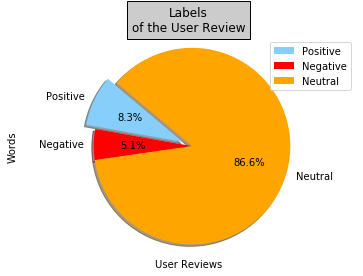

In [14]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Labels\n" + "of the User Review", bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel('User Reviews')
plt.ylabel('Words')
#plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.axis("equal")

In [780]:
frames2 = [top10pos1_mr, top10neg1_mr]

result_polar2 = pd.concat(frames2)
result_polar2.reset_index(drop=True, inplace=True)
result_polar2.index.name = 'Index'
result_polar2

,word,word_freq,label,Outcome
Index,,,,
0,good,122,positive,1
1,delicious,91,positive,1
2,like,87,positive,1
3,great,85,positive,1
4,happy,75,positive,1
5,well,61,positive,1
6,best,59,positive,1
7,recommend,52,positive,1
8,nice,47,positive,1


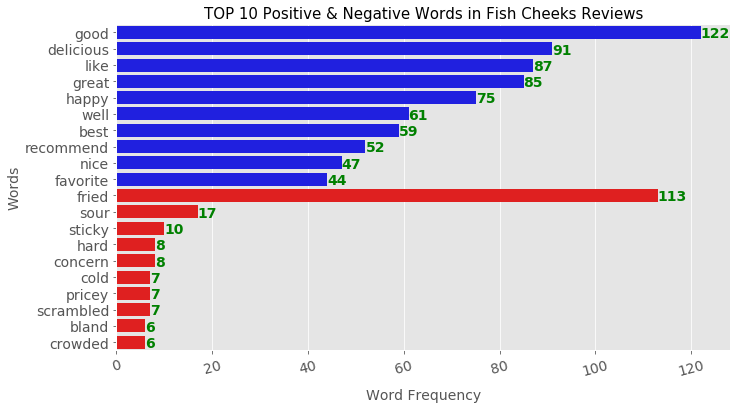

In [788]:
plt.figure(figsize=(11,6))
colors = ['red' if c == 'negative' else 'blue' for c in result_polar2.label]
sns.barplot(y=result_polar2.word, x=result_polar2.word_freq, palette=colors)
plt.xlabel('Word Frequency', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('TOP 10 Positive & Negative Words in Fish Cheeks Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(result_polar2.word_freq):
    plt.text(v, i+0.3, str(v), fontweight='bold', color='green', fontsize=14)

In [538]:
sb_top_reviews1_db.head()

,word,word_freq,label
0,dumplings,360,neutral
1,soup,304,neutral
2,not,152,neutral
3,good,119,positive
4,pork,118,neutral


In [ ]:
#**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?

In [ ]:
#Variables/Columns TIME: Time from pour (seconds) 4-8 FOAM: Wet foam height (cm) 10-16 BEER: Beer height (cm) 18-24

In [695]:
# read csv into dataframe

reviews_ml = pd.read_csv('reviews_ml.csv', encoding='latin-1')
reviews_ml = reviews_ml.dropna()


In [696]:
reviews_ml

,index,label,reviews,restaurant
0,1.0000,mostreviewed,Made the trip to Chinatown to pick-up from Joe...,Shanghai_joe
1,2.0000,mostreviewed,I have been going to this place to eat at thei...,Eataly
2,3.0000,mostreviewed,I love this style of Ramen - such a satisfying...,ippudo_ramen
3,4.0000,mostrecommended,We went here during Restaurant Week 2020. I ha...,fish_cheeks
4,5.0000,mostrecommended,FOODCrispy rice spicy tuna app was delicious! ...,kotobuki
5,6.0000,mostrecommended,Delicious flavored food; great concept to show...,Au_zur


In [73]:
# methods to clean up articles
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re

stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
def accept_words(token):
    return token not in stop_words_ and token not in list(string.punctuation)
def clean_txt(text):
    clean_text = []
    text = re.sub("'", "",text)
    text=re.sub("[\d\W]+"," ",text)  
    clean_text = [ wn.lemmatize(word) for word in word_tokenize(text.lower()) if accept_words(word)]
    return " ".join(clean_text)

# additional features (subjectivity and polarity)
# however, have not used polarity since naive bayes can't take negative values
from textblob import TextBlob
from sklearn.feature_extraction import DictVectorizer
import textstat

def hard_words(text):
    total_words = len(text.split())
    return textstat.difficult_words(text)/total_words
def subj_txt(text):
    return TextBlob(text).sentiment[1]
def polarity_txt(text):
    return (TextBlob(text).sentiment[0] + 1)/2
def readability(text):
    return textstat.automated_readability_index(text)
def unique_words(text):
    return len(set(clean_txt(text).split()))/ len(text.split())



reviews_ml['subj'] = reviews_ml['reviews'].apply(subj_txt)
reviews_ml['pol'] = reviews_ml['reviews'].apply(polarity_txt)
reviews_ml['difficult_words'] = reviews_ml['reviews'].apply(hard_words)
reviews_ml['readability'] = reviews_ml['reviews'].apply(readability)
reviews_ml['unique_words'] = reviews_ml['reviews'].apply(unique_words)

#reviews_collect.groupby('political leaning')['unique_words'].describe()

NameError: name 'reviews_ml' is not defined

In [699]:
reviews_ml

,index,label,reviews,restaurant,subj,pol,difficult_words,readability,unique_words
0,1.0000,mostreviewed,Made the trip to Chinatown to pick-up from Joe...,Shanghai_joe,0.5334,0.6053,0.0777,8.0000,0.2130
1,2.0000,mostreviewed,I have been going to this place to eat at thei...,Eataly,0.5441,0.6118,0.1051,8.9000,0.2682
2,3.0000,mostreviewed,I love this style of Ramen - such a satisfying...,ippudo_ramen,0.5889,0.6122,0.0855,7.0000,0.2293
3,4.0000,mostrecommended,We went here during Restaurant Week 2020. I ha...,fish_cheeks,0.5939,0.6485,0.0804,7.1000,0.2211
4,5.0000,mostrecommended,FOODCrispy rice spicy tuna app was delicious! ...,kotobuki,0.5560,0.5940,0.0976,7.5000,0.2666
5,6.0000,mostrecommended,Delicious flavored food; great concept to show...,Au_zur,0.5974,0.6023,0.1104,7.0000,0.2817


In [ ]:
#Deep dive into Seafood Vs other protein Groups

In [9]:
#running search through yelp and return the max results
data = []
count = 0
for offset in range(0, 1000, 50):
        params = {
            'limit': 50, 
            'location':'New York',
            'term': 'steak',
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data += response.json()['businesses']
            count = count + 1
        elif response.status_code == 400:
            print('400 Bad Request')
            break
data

NameError: name 'url' is not defined

In [49]:
#showing the results of the search in dataframe
df2 = pd.DataFrame(data)
df2

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,peter-luger-brooklyn-2,"[{'alias': 'steak', 'title': 'Steakhouses'}]","{'latitude': 40.709945, 'longitude': -73.962478}",(718) 387-7400,2728.0169,4yPqqJDJOQX69gC66YUDkA,https://s3-media4.fl.yelpcdn.com/bphoto/KRpKd1...,False,"{'address1': '178 Broadway', 'address2': '', '...",Peter Luger,+17183877400,$$$$,4.0000,5736,[],https://www.yelp.com/biz/peter-luger-brooklyn-...
1,club-a-steakhouse-new-york,"[{'alias': 'steak', 'title': 'Steakhouses'}]","{'latitude': 40.76006, 'longitude': -73.96557}",(212) 688-4190,6537.2114,A_YpTLbAlEqeLVSs9bxbEA,https://s3-media3.fl.yelpcdn.com/bphoto/jGeSUe...,False,"{'address1': '240 E 58th St', 'address2': '', ...",Club A Steakhouse,+12126884190,$$$,4.5000,2782,[],https://www.yelp.com/biz/club-a-steakhouse-new...
2,rocco-steakhouse-new-york,"[{'alias': 'tradamerican', 'title': 'American ...","{'latitude': 40.7438607, 'longitude': -73.9861...",(212) 696-9660,4326.7928,REDWyPG0UJc5u8iU8mP6Hw,https://s3-media4.fl.yelpcdn.com/bphoto/wzwm0d...,False,"{'address1': '72 Madison Ave', 'address2': Non...",Rocco Steakhouse,+12126969660,$$$,4.5000,354,"[delivery, pickup]",https://www.yelp.com/biz/rocco-steakhouse-new-...
3,ikinari-steak-east-village-new-york,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...","{'latitude': 40.73088, 'longitude': -73.98968}",(917) 388-3546,2852.3815,kr_Wu5m0P-AEghraNqXeTA,https://s3-media4.fl.yelpcdn.com/bphoto/xrn4DH...,False,"{'address1': '90 E 10th St', 'address2': None,...",Ikinari Steak East Village,+19173883546,$$,4.0000,774,"[delivery, restaurant_reservation, pickup]",https://www.yelp.com/biz/ikinari-steak-east-vi...
4,bowery-meat-company-new-york,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...","{'latitude': 40.72453, 'longitude': -73.9917876}",(212) 460-5255,2136.2485,qpkFmGyvbZv-g2fbwyNQUg,https://s3-media2.fl.yelpcdn.com/bphoto/1APX7R...,False,"{'address1': '9 E 1st St', 'address2': '', 'ad...",Bowery Meat Company,+12124605255,$$$,4.0000,494,"[delivery, pickup]",https://www.yelp.com/biz/bowery-meat-company-n...
5,boucherie-union-square-new-york,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...","{'latitude': 40.73715, 'longitude': -73.98789}",(212) 353-0200,3566.7953,8XHbZIKDQbXhyKIGiukVeQ,https://s3-media3.fl.yelpcdn.com/bphoto/8htAuZ...,False,"{'address1': '225 Park Ave S', 'address2': Non...",Boucherie Union Square,+12123530200,$$$,4.5000,744,"[delivery, restaurant_reservation, pickup]",https://www.yelp.com/biz/boucherie-union-squar...
6,keens-steakhouse-new-york,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...","{'latitude': 40.75071, 'longitude': -73.98652}",(212) 947-3636,5071.6890,pQuZDnefX038xurT1BhDXA,https://s3-media1.fl.yelpcdn.com/bphoto/7JFpQR...,False,"{'address1': '72 W 36th St', 'address2': '', '...",Keens Steakhouse,+12129473636,$$$$,4.0000,2553,[],https://www.yelp.com/biz/keens-steakhouse-new-...
7,st-anselm-brooklyn,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.7143299, 'longitude': -73.95604}",(718) 384-5054,3369.1595,hiTfA7vnxDSLv77nl6UQXQ,https://s3-media2.fl.yelpcdn.com/bphoto/Na0QUg...,False,"{'address1': '355 Metropolitan Ave', 'address2...",St. Anselm,+17183845054,$$$,4.0000,821,"[delivery, pickup]",https://www.yelp.com/biz/st-anselm-brooklyn?ad...
8,salt-charcoal-brooklyn,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.71453, 'longitude': -73.9613511}",(718) 782-2087,2954.6881,m1cJLpDN4B-_0hGgPfe5OA,https://s3-media3.fl.yelpcdn.com/bphoto/RDtbfJ...,False,"{'address1': '171 Grand St', 'address2': '', '...",Salt + Charcoal,+17187822087,$$,4.0000,468,"[delivery, pickup]",https://www.yelp.com/biz/salt-charcoal-brookly...
9,steak-freak-new-york,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...","{'latitude': 40.75991, 'longitude': -73.980429}",(607) 203-3239,6167.8769,ZdhzqQd3haOn1eAiwH2WDw,https://s3-media2.fl.yelpcdn.com/bphoto/R8taY9...,False,"{'address

In [52]:
df2[['new_url2', 'new_url3']]=df2['url'].str.split('?', expand=True,n=2)

In [57]:
df2['new_url2'][2]

'https://www.yelp.com/biz/rocco-steakhouse-new-york'

In [58]:
peter_luger = df2['new_url2'][0]
club_a = df2['new_url2'][1]
rocco = df2['new_url2'][2]



In [8]:
#Seabass
#url_top1
#url_top2
#url_top3
#url_rec1
#url_rec2
#url_rec3


start = 0
num_pages = 7
end = 20* num_pages
x = 1
reviews = []
quote_add = []

while (start < end):
    try:
        new_url = peter_luger + '?start=' + str(start)
        start +=20
        print (new_url)
        response = requests.get(new_url)
        soup = BeautifulSoup(response.text, "html.parser")
    #print(soup.prettify())
    #instructions = recipeSoup.find('div', class_='hidden').text
    #right_table4=soup.find_all('p', itemprop='description')
        quotes = soup.find_all('span', class_ = 'lemon--span__373c0__3997G raw__373c0__3rKqk')
        for quote in quotes:
            x = x+1
            print('Review:', x, '-------------')
            print(quote.text)
            quote_add.append(quote.text)
#-------------------------------------------------------------------newly added
#Makes all the letters lower in reviews
            review = quote.text.lower()
#expandContractions will put the dictionary made earlier to replace the contractions in the reviews
#Make sure to to run the cList dict cell or else there will be an error
            expandContractions(review)
#Cleaning the lemmas or words in reviews now will make it easier when we start predictive modeling
            words = word_tokenize(review)
            words = word_tokenize(review.replace('\n',' '))
            clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
            characters_to_remove = ["''",'``','...']
            clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
            english_stops = set(stopwords.words('english'))
            clean_words = [word for word in clean_words if word not in english_stops]
            wordnet_lemmatizer = WordNetLemmatizer()
            lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
            #lemma_list = str.replace(right_table4.get_text(strip=True),". ",".")
            reviews.append(lemma_list)
    #reviews.add(a)
    except:
    #reviews.append(right_table4)
        time.sleep(5)
    #print("Reviews:", a,"\n")
        page = urllib.request.urlopen(url)
        soup = BeautifulSoup(page)


NameError: name 'time' is not defined

In [7]:
peter_l = pd.DataFrame(quote_add, columns=['reviews'])
# reviews_collect_cleaned = pd.DataFrame(np.array(reviews), columns=['review'])
# reviews_collect_cleaned.head()

NameError: name 'quote_add' is not defined

In [68]:
#peter_l.to_csv (r'C:\Users\leroy\Desktop\reviews8.csv', index = True, header=True)

In [4]:
peter_l.head(5)


NameError: name 'peter_l' is not defined

In [3]:
peter_l['subj'] = peter_l['reviews'].apply(subj_txt)
peter_l['pol'] = peter_l['reviews'].apply(polarity_txt)
peter_l['difficult_words'] = peter_l['reviews'].apply(hard_words)
peter_l['readability'] = peter_l['reviews'].apply(readability)
peter_l['unique_words'] = peter_l['reviews'].apply(unique_words)

NameError: name 'peter_l' is not defined

In [2]:
peter_l = peter_l.drop([0, 1])

NameError: name 'peter_l' is not defined

In [1]:
peter_l = peter_l.mean()

NameError: name 'peter_l' is not defined

In [93]:
peter_l

,reviews,subj,pol,difficult_words,readability,unique_words
2,Hands down the BEST STEAK IN NY. A Michelin s...,0.5325,0.6100,0.1860,50.3000,0.4772
3,"Yesterday (June 7th, 2020) I was walking past ...",0.4033,0.5117,0.2000,10.2000,0.5600
4,Peter Luger is now delivering through Caviar. ...,0.7412,0.7025,0.0982,79.4000,0.3374
5,"We love Peter Luger! In these times, I'm very ...",0.7494,0.7979,0.1186,6.8000,0.4492
6,// ServiceI had the day off (President's Day) ...,0.6055,0.6951,0.1186,7.3000,0.3654
7,"Yes. After a million years, Peter Luger delive...",0.6694,0.6550,0.1356,6.0000,0.5000
8,I Actually had luxury to try to place out in B...,0.4680,0.6664,0.1509,8.3000,0.4277
9,Legendary steakhouse serving the best dry aged...,0.4904,0.6232,0.1907,10.5000,0.4864
10,Great steaks and other foods here people. I me...,0.5904,0.6885,0.0182,0.4000,0.3455
11,"tl;dr Solid steakhouse, really large portions ...",0.5104,0.6123,0.1009,3.9000,0.4587
